<a href="https://colab.research.google.com/github/SaiTejaBorgam/Data-Science-Project/blob/main/Project%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

pd.set_option('mode.chained_assignment', None)
%matplotlib inline


In [67]:
#Connecting my google drive to colab to read files

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
#Loading both Bitcoin and Ethereum datasets from my google drive

Bitcoin = pd.read_csv("/content/drive/MyDrive/Bitcoin_Price.csv")
print(f"Dataset loaded with {len(Bitcoin)} rows and {len(Bitcoin.columns)} columns.")

Ethereum = pd.read_csv("/content/drive/MyDrive/Ethereum_Price.csv")
print(f"Dataset loaded with {len(Ethereum)} rows and {len(Ethereum.columns)} columns.")

Dataset loaded with 4309 rows and 4 columns.
Dataset loaded with 3479 rows and 4 columns.


##**Exploratory Data Analysis and Common preprocessing**

In [69]:
Bitcoin.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [70]:
Bitcoin.tail()

,snapped_at,price,market_cap,total_volume
4304,2025-02-10 00:00:00 UTC,96548.578654,1.913069e+12,2.545711e+10
4305,2025-02-11 00:00:00 UTC,97399.981614,1.930743e+12,3.705499e+10
4306,2025-02-12 00:00:00 UTC,95739.977371,1.898789e+12,3.645458e+10
4307,2025-02-13 00:00:00 UTC,97836.188561,1.936842e+12,4.711562e+10
4308,2025-02-14 00:00:00 UTC,96561.663999,1.914315e+12,2.908437e+10


In [71]:
Ethereum.head()

,snapped_at,price,market_cap,total_volume
0,2015-08-07 00:00:00 UTC,2.831620,0.000000e+00,9.062200e+04
1,2015-08-08 00:00:00 UTC,1.330750,8.033948e+07,3.680700e+05
2,2015-08-10 00:00:00 UTC,0.687586,4.155631e+07,4.004641e+05
3,2015-08-11 00:00:00 UTC,1.067379,6.453901e+07,1.518998e+06
4,2015-08-12 00:00:00 UTC,1.256613,7.601326e+07,2.073893e+06


In [72]:
Ethereum.tail()

,snapped_at,price,market_cap,total_volume
3474,2025-02-10 00:00:00 UTC,2632.535822,3.173697e+11,1.715554e+10
3475,2025-02-11 00:00:00 UTC,2660.296800,3.207115e+11,1.884342e+10
3476,2025-02-12 00:00:00 UTC,2603.033370,3.139432e+11,2.121291e+10
3477,2025-02-13 00:00:00 UTC,2736.270314,3.294925e+11,2.650366e+10
3478,2025-02-14 00:00:00 UTC,2675.709001,3.225841e+11,1.893819e+10


In [73]:
#Checking if dataset has any null values
Bitcoin.isnull().sum()

,0
snapped_at,0
price,0
market_cap,1
total_volume,0


In [74]:
#Filling the missing values using forward fill
Bitcoin.fillna(method='ffill', inplace=True)

<ipython-input-74-4afe5252b6fb>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Bitcoin.fillna(method='ffill', inplace=True)


In [75]:
#Checking if dataset has any null values
Ethereum.isnull().sum()

,0
snapped_at,0
price,0
market_cap,1
total_volume,0


In [76]:
#Filling the missing values using forward fill

Ethereum.fillna(method='ffill', inplace=True)

<ipython-input-76-584d60e55515>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Ethereum.fillna(method='ffill', inplace=True)


In [77]:
#Printing summary statistics to understand dataset

Bitcoin.describe()

,price,market_cap,total_volume
count,4309.000000,4.309000e+03,4.309000e+03
mean,18158.924482,3.461312e+11,1.662990e+10
std,23100.015393,4.522337e+11,2.058948e+10
min,67.809000,7.713681e+08,0.000000e+00
25%,619.908800,9.033842e+09,3.699869e+08
50%,7977.244882,1.395859e+11,7.496626e+09
75%,28988.320996,5.554594e+11,2.696615e+10
max,106182.236820,2.100630e+12,1.904603e+11


In [78]:
#Printing summary statistics to understand dataset

Ethereum.describe()

,price,market_cap,total_volume
count,3479.000000,3.479000e+03,3.479000e+03
mean,1176.032677,1.382608e+11,1.078938e+10
std,1245.440600,1.497980e+11,1.281599e+10
min,0.432979,0.000000e+00,8.707480e+04
25%,156.648274,1.646828e+10,9.597204e+08
50%,472.977265,4.865661e+10,7.873172e+09
75%,1976.364164,2.356591e+11,1.553064e+10
max,4815.004634,5.716658e+11,1.409065e+11


In [79]:
#Checking the datatypes

Bitcoin.dtypes

,0
snapped_at,object
price,float64
market_cap,float64
total_volume,float64


In [80]:
#Checking the datatypes

Ethereum.dtypes

,0
snapped_at,object
price,float64
market_cap,float64
total_volume,float64


In [81]:
#Converting the date column(snapped_at) from object datatype to datatime format

Bitcoin['snapped_at'] = pd.to_datetime(Bitcoin['snapped_at'])

In [82]:
#Converting the date column(snapped_at) from object datatype to datatime format

Ethereum['snapped_at'] = pd.to_datetime(Ethereum['snapped_at'])

In [83]:
#Ensuring all datatypes are good to use

Bitcoin.dtypes

,0
snapped_at,"datetime64[ns, UTC]"
price,float64
market_cap,float64
total_volume,float64


In [84]:
#Ensuring all datatypes are good to use

Ethereum.dtypes

,0
snapped_at,"datetime64[ns, UTC]"
price,float64
market_cap,float64
total_volume,float64


In [85]:
Bitcoin.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00+00:00,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00+00:00,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00+00:00,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00+00:00,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00+00:00,103.43,1.148668e+09,0.0


In [86]:
Bitcoin.tail()

,snapped_at,price,market_cap,total_volume
4304,2025-02-10 00:00:00+00:00,96548.578654,1.913069e+12,2.545711e+10
4305,2025-02-11 00:00:00+00:00,97399.981614,1.930743e+12,3.705499e+10
4306,2025-02-12 00:00:00+00:00,95739.977371,1.898789e+12,3.645458e+10
4307,2025-02-13 00:00:00+00:00,97836.188561,1.936842e+12,4.711562e+10
4308,2025-02-14 00:00:00+00:00,96561.663999,1.914315e+12,2.908437e+10


In [87]:
Ethereum.head()

,snapped_at,price,market_cap,total_volume
0,2015-08-07 00:00:00+00:00,2.831620,0.000000e+00,9.062200e+04
1,2015-08-08 00:00:00+00:00,1.330750,8.033948e+07,3.680700e+05
2,2015-08-10 00:00:00+00:00,0.687586,4.155631e+07,4.004641e+05
3,2015-08-11 00:00:00+00:00,1.067379,6.453901e+07,1.518998e+06
4,2015-08-12 00:00:00+00:00,1.256613,7.601326e+07,2.073893e+06


In [88]:
Ethereum.tail()

,snapped_at,price,market_cap,total_volume
3474,2025-02-10 00:00:00+00:00,2632.535822,3.173697e+11,1.715554e+10
3475,2025-02-11 00:00:00+00:00,2660.296800,3.207115e+11,1.884342e+10
3476,2025-02-12 00:00:00+00:00,2603.033370,3.139432e+11,2.121291e+10
3477,2025-02-13 00:00:00+00:00,2736.270314,3.294925e+11,2.650366e+10
3478,2025-02-14 00:00:00+00:00,2675.709001,3.225841e+11,1.893819e+10


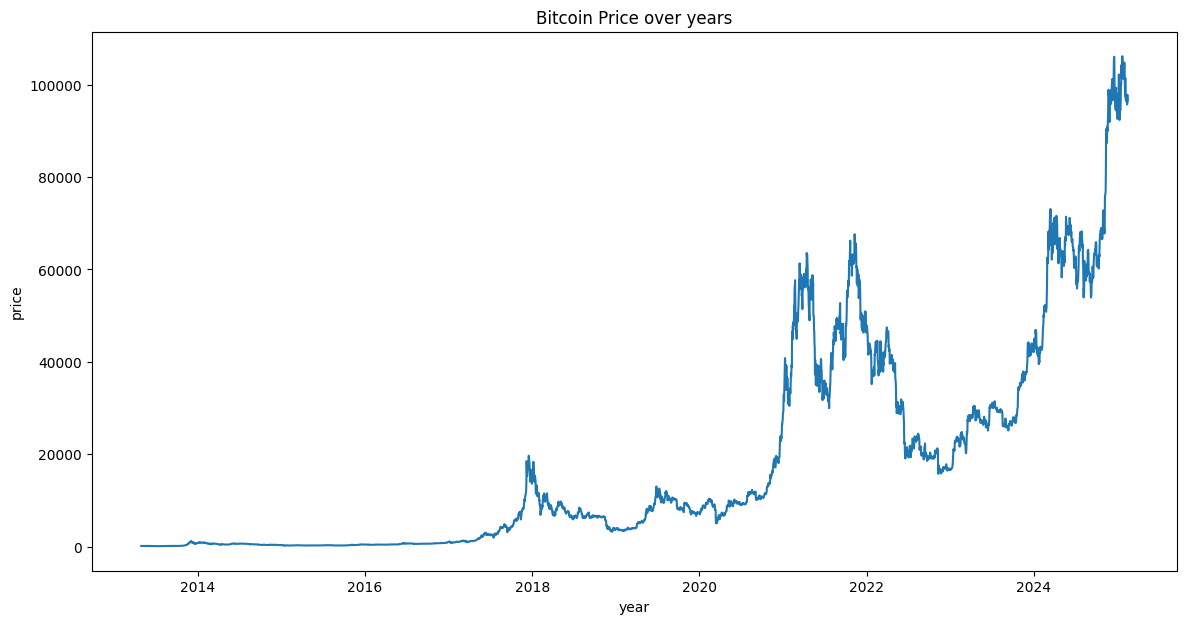

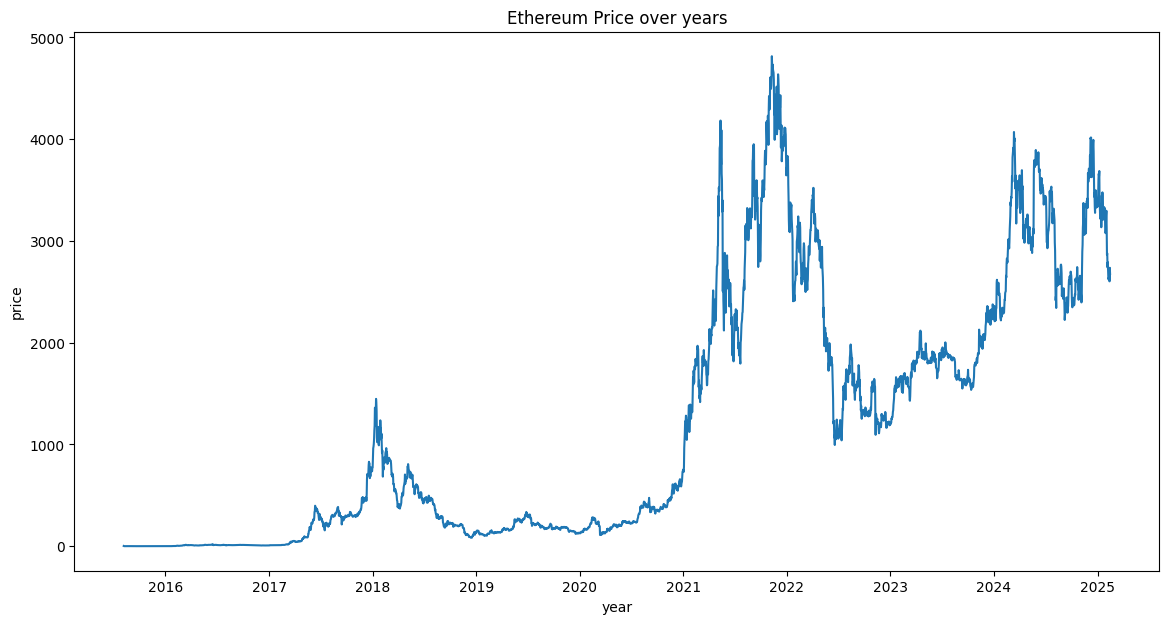

In [89]:
#Visualising both Bitcoin and Ethereum prices

plt.figure(figsize=(14,7))
plt.plot(Bitcoin['snapped_at'], Bitcoin['price'])
plt.title("Bitcoin Price over years")
plt.xlabel("year")
plt.ylabel("price")
plt.show()

plt.figure(figsize=(14,7))
plt.plot(Ethereum['snapped_at'], Ethereum['price'])
plt.title("Ethereum Price over years")
plt.xlabel("year")
plt.ylabel("price")
plt.show()

Outliers detected:
                    snapped_at         price    market_cap  total_volume
3969 2024-03-12 00:00:00+00:00  72130.553008  1.417773e+12  6.665307e+10
3971 2024-03-14 00:00:00+00:00  73097.767027  1.436631e+12  5.190660e+10
3997 2024-04-09 00:00:00+00:00  71624.184862  1.410325e+12  3.311195e+10
4201 2024-10-30 00:00:00+00:00  72781.113082  1.439310e+12  6.548778e+10
4202 2024-10-31 00:00:00+00:00  72342.621711  1.431086e+12  4.349814e+10
...                        ...           ...           ...           ...
4304 2025-02-10 00:00:00+00:00  96548.578654  1.913069e+12  2.545711e+10
4305 2025-02-11 00:00:00+00:00  97399.981614  1.930743e+12  3.705499e+10
4306 2025-02-12 00:00:00+00:00  95739.977371  1.898789e+12  3.645458e+10
4307 2025-02-13 00:00:00+00:00  97836.188561  1.936842e+12  4.711562e+10
4308 2025-02-14 00:00:00+00:00  96561.663999  1.914315e+12  2.908437e+10

[105 rows x 4 columns]


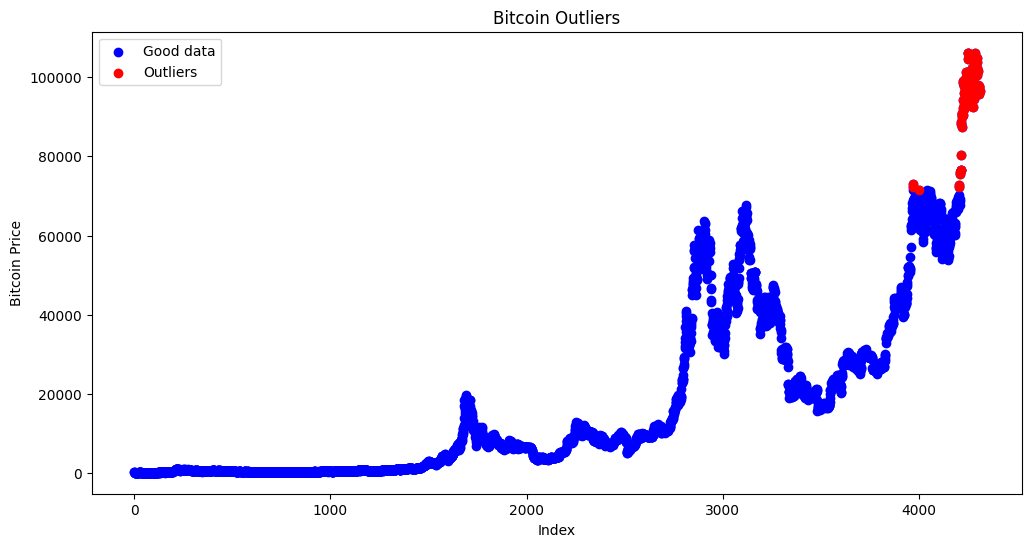

Cleaned Data:
                    snapped_at         price    market_cap  total_volume
0    2013-04-28 00:00:00+00:00    135.300000  1.500518e+09  0.000000e+00
1    2013-04-29 00:00:00+00:00    141.960000  1.575032e+09  0.000000e+00
2    2013-04-30 00:00:00+00:00    135.300000  1.501657e+09  0.000000e+00
3    2013-05-01 00:00:00+00:00    117.000000  1.298952e+09  0.000000e+00
4    2013-05-02 00:00:00+00:00    103.430000  1.148668e+09  0.000000e+00
...                        ...           ...           ...           ...
4204 2024-11-02 00:00:00+00:00  69507.922564  1.374687e+12  5.486309e+10
4205 2024-11-03 00:00:00+00:00  69299.160367  1.370517e+12  1.470938e+10
4206 2024-11-04 00:00:00+00:00  68803.506263  1.362302e+12  3.765944e+10
4207 2024-11-05 00:00:00+00:00  67793.297827  1.340193e+12  4.618311e+10
4208 2024-11-06 00:00:00+00:00  69335.425531  1.370964e+12  4.002502e+10

[4204 rows x 4 columns]


In [90]:
#Detecting bitcoin outliers using interquartile range method and removing them

#Calculating quarlite ranges
Q1 = Bitcoin["price"].quantile(0.25)
Q3 = Bitcoin["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Detecting outliers
outliers = Bitcoin[(Bitcoin["price"] < lower_bound) | (Bitcoin["price"] > upper_bound)]
print("Outliers detected:")
print(outliers)

#Plotting the outliers
plt.figure(figsize=(12, 6))
plt.scatter(Bitcoin.index, Bitcoin['price'], color='blue', label="Good data")
plt.scatter(outliers.index, outliers['price'], color='red', label="Outliers")
plt.xlabel("Index")
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Outliers")
plt.legend()
plt.show()

#Removing them and storing teh data in new dataframe
Bitcoin_afterclean = Bitcoin[(Bitcoin["price"] >= lower_bound) & (Bitcoin["price"] <= upper_bound)]
print("Cleaned Data:")
print(Bitcoin_afterclean)

Outliers detected:
                    snapped_at        price    market_cap  total_volume
2285 2021-11-09 00:00:00+00:00  4815.004634  5.716658e+11  2.122635e+10
2286 2021-11-10 00:00:00+00:00  4742.080911  5.609643e+11  2.066958e+10
2288 2021-11-12 00:00:00+00:00  4732.924450  5.602261e+11  1.904832e+10


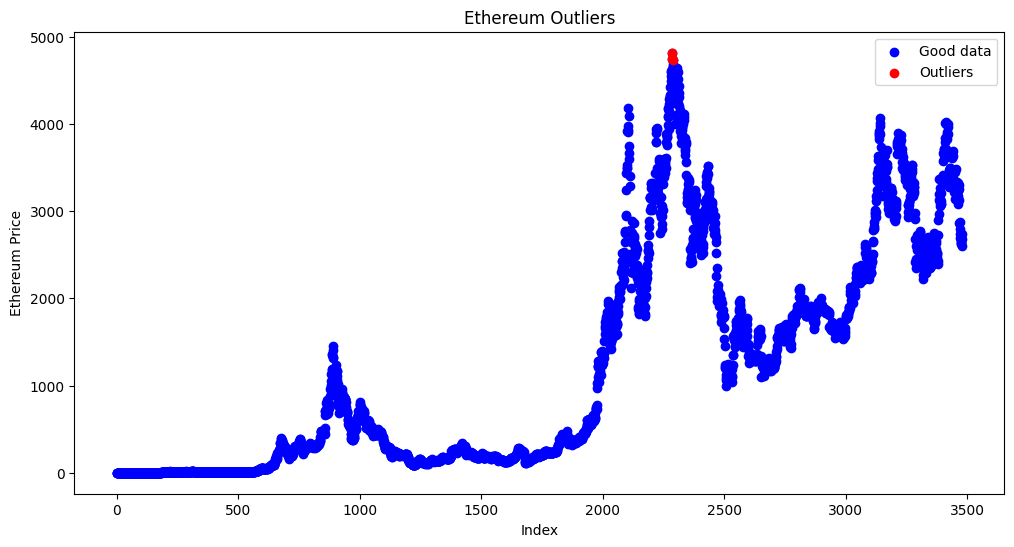

Cleaned Data:
                    snapped_at        price    market_cap  total_volume
0    2015-08-07 00:00:00+00:00     2.831620  0.000000e+00  9.062200e+04
1    2015-08-08 00:00:00+00:00     1.330750  8.033948e+07  3.680700e+05
2    2015-08-10 00:00:00+00:00     0.687586  4.155631e+07  4.004641e+05
3    2015-08-11 00:00:00+00:00     1.067379  6.453901e+07  1.518998e+06
4    2015-08-12 00:00:00+00:00     1.256613  7.601326e+07  2.073893e+06
...                        ...          ...           ...           ...
3474 2025-02-10 00:00:00+00:00  2632.535822  3.173697e+11  1.715554e+10
3475 2025-02-11 00:00:00+00:00  2660.296800  3.207115e+11  1.884342e+10
3476 2025-02-12 00:00:00+00:00  2603.033370  3.139432e+11  2.121291e+10
3477 2025-02-13 00:00:00+00:00  2736.270314  3.294925e+11  2.650366e+10
3478 2025-02-14 00:00:00+00:00  2675.709001  3.225841e+11  1.893819e+10

[3476 rows x 4 columns]


In [91]:
#Detecting Ethereum outliers using interquartile range method and removing them

#Calculating quarlite ranges
Q1 = Ethereum["price"].quantile(0.25)
Q3 = Ethereum["price"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Detecting outliers
outliers = Ethereum[(Ethereum["price"] < lower_bound) | (Ethereum["price"] > upper_bound)]
print("Outliers detected:")
print(outliers)

#Plotting the outliers
plt.figure(figsize=(12, 6))
plt.scatter(Ethereum.index, Ethereum['price'], color='blue', label="Good data")
plt.scatter(outliers.index, outliers['price'], color='red', label="Outliers")
plt.xlabel("Index")
plt.ylabel("Ethereum Price")
plt.title("Ethereum Outliers")
plt.legend()
plt.show()

#Removing them and storing teh data in new dataframe
Ethereum_afterclean = Ethereum[(Ethereum["price"] >= lower_bound) & (Ethereum["price"] <= upper_bound)]
print("Cleaned Data:")
print(Ethereum_afterclean)

##**Feature engineering**

In [92]:
#Calculating the technical indicators for the bitcoin dataset


#SMA - Simple moving average (50day and 200day)

Bitcoin_afterclean["SMA_50"] = Bitcoin_afterclean["price"].rolling(window=50).mean()
Bitcoin_afterclean["SMA_200"] = Bitcoin_afterclean["price"].rolling(window=200).mean()

#EMA - Exponential moving average (20day and 50day)

Bitcoin_afterclean["EMA_20"] = Bitcoin_afterclean["price"].ewm(span=20, adjust=False).mean()
Bitcoin_afterclean["EMA_50"] = Bitcoin_afterclean["price"].ewm(span=50, adjust=False).mean()

#Bollinger Bands (Using 50day window)

Bitcoin_afterclean["Rolling_STD"] = Bitcoin_afterclean["price"].rolling(window=50).std()
Bitcoin_afterclean["BB_Upper"] = Bitcoin_afterclean["SMA_50"] + (2 * Bitcoin_afterclean["Rolling_STD"])
Bitcoin_afterclean["BB_Lower"] = Bitcoin_afterclean["SMA_50"] - (2 * Bitcoin_afterclean["Rolling_STD"])

#RSI - Relative strength index (14days)

Bitcoin_afterclean["price_change"] = Bitcoin_afterclean["price"].diff()

Bitcoin_afterclean["gain"] = Bitcoin_afterclean["price_change"].where(Bitcoin_afterclean["price_change"] > 0, 0)
Bitcoin_afterclean["loss"] = -Bitcoin_afterclean["price_change"].where(Bitcoin_afterclean["price_change"] < 0, 0)
periods = 14
Bitcoin_afterclean["avg_of_gain"] = Bitcoin_afterclean["gain"].rolling(window=periods).mean()
Bitcoin_afterclean["avg_of_loss"] = Bitcoin_afterclean["loss"].rolling(window=periods).mean()
#relative strength
Bitcoin_afterclean["RS"] = Bitcoin_afterclean["avg_of_gain"] / Bitcoin_afterclean["avg_of_loss"]
#rsi
Bitcoin_afterclean["RSI"] = 100 - (100 / (1 + Bitcoin_afterclean["RS"]))

#MACD - Moving average convergence divergence

Bitcoin_afterclean["EMA_12"] = Bitcoin_afterclean["price"].ewm(span=12, adjust=False).mean()
Bitcoin_afterclean["EMA_26"] = Bitcoin_afterclean["price"].ewm(span=26, adjust=False).mean()
#macd line
Bitcoin_afterclean["MACD_Line"] = Bitcoin_afterclean["EMA_12"] - Bitcoin_afterclean["EMA_26"]
#signal line
Bitcoin_afterclean["Signal_Line"] = Bitcoin_afterclean["MACD_Line"].ewm(span=9, adjust=False).mean()
#macd histogram
Bitcoin_afterclean["MACD_Histogram"] = Bitcoin_afterclean["MACD_Line"] - Bitcoin_afterclean["Signal_Line"]

#On balance volume

Bitcoin_afterclean["OBV"] = 0

for i in range(1, len(Bitcoin_afterclean)):
    if Bitcoin_afterclean["price"].iloc[i] > Bitcoin_afterclean["price"].iloc[i - 1]:
        Bitcoin_afterclean.loc[Bitcoin_afterclean.index[i], "OBV"] = Bitcoin_afterclean["OBV"].iloc[i - 1] + Bitcoin_afterclean["total_volume"].iloc[i]
    elif Bitcoin_afterclean["price"].iloc[i] < Bitcoin_afterclean["price"].iloc[i - 1]:
        Bitcoin_afterclean.loc[Bitcoin_afterclean.index[i], "OBV"] = Bitcoin_afterclean["OBV"].iloc[i - 1] - Bitcoin_afterclean["total_volume"].iloc[i]
    else:
        Bitcoin_afterclean.loc[Bitcoin_afterclean.index[i], "OBV"] = Bitcoin_afterclean["OBV"].iloc[i - 1]

#Stochastic oscillators

n = 14
Bitcoin_afterclean["Lowest_n"] = Bitcoin_afterclean["price"].rolling(window=n, min_periods=1).min()
Bitcoin_afterclean["Highest_n"] = Bitcoin_afterclean["price"].rolling(window=n, min_periods=1).max()

# %K - Fast Stochastic
Bitcoin_afterclean["%K"] = ((Bitcoin_afterclean["price"] - Bitcoin_afterclean["Lowest_n"]) / (Bitcoin_afterclean["Highest_n"] - Bitcoin_afterclean["Lowest_n"])) * 100
# %D - Slow Stochastic
Bitcoin_afterclean["%D"] = Bitcoin_afterclean["%K"].rolling(window=3, min_periods=1).mean()


<ipython-input-92-229d3a890ea5>:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-174096570.3350153' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Bitcoin_afterclean.loc[Bitcoin_afterclean.index[i], "OBV"] = Bitcoin_afterclean["OBV"].iloc[i - 1] - Bitcoin_afterclean["total_volume"].iloc[i]


In [93]:
#Calculating the technical indicators for the ethereum dataset


#SMA - Simple moving average (50day and 200day)

Ethereum_afterclean["SMA_50"] = Ethereum_afterclean["price"].rolling(window=50).mean()
Ethereum_afterclean["SMA_200"] = Ethereum_afterclean["price"].rolling(window=200).mean()

#EMA - Exponential moving average (20day and 50day)

Ethereum_afterclean["EMA_20"] = Ethereum_afterclean["price"].ewm(span=20, adjust=False).mean()
Ethereum_afterclean["EMA_50"] = Ethereum_afterclean["price"].ewm(span=50, adjust=False).mean()

#Bollinger Bands (Using 50day window)

Ethereum_afterclean["Rolling_STD"] = Ethereum_afterclean["price"].rolling(window=50).std()
Ethereum_afterclean["BB_Upper"] = Ethereum_afterclean["SMA_50"] + (2 * Ethereum_afterclean["Rolling_STD"])
Ethereum_afterclean["BB_Lower"] = Ethereum_afterclean["SMA_50"] - (2 * Ethereum_afterclean["Rolling_STD"])

#RSI - Relative strength index (14days)

Ethereum_afterclean["price_change"] = Ethereum_afterclean["price"].diff()

Ethereum_afterclean["gain"] = Ethereum_afterclean["price_change"].where(Ethereum_afterclean["price_change"] > 0, 0)
Ethereum_afterclean["loss"] = -Ethereum_afterclean["price_change"].where(Ethereum_afterclean["price_change"] < 0, 0)
periods = 14
Ethereum_afterclean["avg_of_gain"] = Ethereum_afterclean["gain"].rolling(window=periods).mean()
Ethereum_afterclean["avg_of_loss"] = Ethereum_afterclean["loss"].rolling(window=periods).mean()
#relative strength
Ethereum_afterclean["RS"] = Ethereum_afterclean["avg_of_gain"] / Ethereum_afterclean["avg_of_loss"]
#rsi
Ethereum_afterclean["RSI"] = 100 - (100 / (1 + Ethereum_afterclean["RS"]))

#MACD - Moving average convergence divergence

Ethereum_afterclean["EMA_12"] = Ethereum_afterclean["price"].ewm(span=12, adjust=False).mean()
Ethereum_afterclean["EMA_26"] = Ethereum_afterclean["price"].ewm(span=26, adjust=False).mean()
#macd line
Ethereum_afterclean["MACD_Line"] = Ethereum_afterclean["EMA_12"] - Bitcoin_afterclean["EMA_26"]
#signal line
Ethereum_afterclean["Signal_Line"] = Ethereum_afterclean["MACD_Line"].ewm(span=9, adjust=False).mean()
#macd histogram
Ethereum_afterclean["MACD_Histogram"] = Ethereum_afterclean["MACD_Line"] - Ethereum_afterclean["Signal_Line"]

#On balance volume

Ethereum_afterclean["OBV"] = 0
for i in range(1, len(Ethereum_afterclean)):
    if Ethereum_afterclean["price"].iloc[i] > Ethereum_afterclean["price"].iloc[i - 1]:
        Ethereum_afterclean.loc[Ethereum_afterclean.index[i], "OBV"] = Ethereum_afterclean["OBV"].iloc[i - 1] + Ethereum_afterclean["total_volume"].iloc[i]
    elif Ethereum_afterclean["price"].iloc[i] < Ethereum_afterclean["price"].iloc[i - 1]:
        Ethereum_afterclean.loc[Ethereum_afterclean.index[i], "OBV"] = Ethereum_afterclean["OBV"].iloc[i - 1] - Ethereum_afterclean["total_volume"].iloc[i]
    else:
        Ethereum_afterclean.loc[Ethereum_afterclean.index[i], "OBV"] = Ethereum_afterclean["OBV"].iloc[i - 1]

#Stochastic oscillators

n = 14
Ethereum_afterclean["Lowest_n"] = Ethereum_afterclean["price"].rolling(window=n, min_periods=1).min()
Ethereum_afterclean["Highest_n"] = Ethereum_afterclean["price"].rolling(window=n, min_periods=1).max()
# %K - Fast Stochastic
Ethereum_afterclean["%K"] = ((Ethereum_afterclean["price"] - Ethereum_afterclean["Lowest_n"]) / (Ethereum_afterclean["Highest_n"] - Ethereum_afterclean["Lowest_n"])) * 100
# %D - Slow Stochastic
Ethereum_afterclean["%D"] = Ethereum_afterclean["%K"].rolling(window=3, min_periods=1).mean()

<ipython-input-93-7b337115a74b>:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-768534.074543549' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Ethereum_afterclean.loc[Ethereum_afterclean.index[i], "OBV"] = Ethereum_afterclean["OBV"].iloc[i - 1] - Ethereum_afterclean["total_volume"].iloc[i]


In [94]:
#Checking the calculated dataset
Bitcoin_afterclean.tail()

,snapped_at,price,market_cap,total_volume,SMA_50,SMA_200,EMA_20,EMA_50,Rolling_STD,BB_Upper,...,EMA_12,EMA_26,MACD_Line,Signal_Line,MACD_Histogram,OBV,Lowest_n,Highest_n,%K,%D
4204,2024-11-02 00:00:00+00:00,69507.922564,1.374687e+12,5.486309e+10,64050.396607,63310.435465,67137.015488,64769.526674,3376.657340,70803.711288,...,68113.937867,66503.464756,1610.473111,1490.096497,120.376614,2.128281e+12,66585.665355,70264.997356,79.423580,93.141193
4205,2024-11-03 00:00:00+00:00,69299.160367,1.370517e+12,1.470938e+10,64288.744525,63328.167967,67342.934048,64947.159368,3316.401124,70921.546774,...,68296.279790,66710.553320,1585.726470,1509.222492,76.503978,2.113572e+12,66585.665355,70264.997356,73.749665,84.391082
4206,2024-11-04 00:00:00+00:00,68803.506263,1.362302e+12,3.765944e+10,64502.675626,63355.032641,67482.036164,65098.388658,3253.906550,71010.488726,...,68374.314632,66865.586871,1508.727761,1509.123546,-0.395785,2.075912e+12,66585.665355,70264.997356,60.278358,71.150534
4207,2024-11-05 00:00:00+00:00,67793.297827,1.340193e+12,4.618311e+10,64646.129033,63375.396622,67511.680132,65204.071370,3237.334620,71120.798272,...,68284.927431,66934.306201,1350.621230,1477.423083,-126.801853,2.029729e+12,66585.665355,70264.997356,32.822058,55.616693
4208,2024-11-06 00:00:00+00:00,69335.425531,1.370964e+12,4.002502e+10,64832.771556,63415.429260,67685.370170,65366.085259,3233.208742,71299.189039,...,68446.542524,67112.166892,1334.375631,1448.813592,-114.437961,2.069754e+12,66585.665355,70264.997356,74.735310,55.945242


In [95]:
#Checking the calculated dataset
Ethereum_afterclean.tail()

,snapped_at,price,market_cap,total_volume,SMA_50,SMA_200,EMA_20,EMA_50,Rolling_STD,BB_Upper,...,EMA_12,EMA_26,MACD_Line,Signal_Line,MACD_Histogram,OBV,Lowest_n,Highest_n,%K,%D
3474,2025-02-10 00:00:00+00:00,2632.535822,3.173697e+11,1.715554e+10,3238.671639,2956.951865,2956.676611,3159.110250,261.510540,3761.692719,...,2836.776128,3021.227808,-17099.924358,-16769.807328,-330.117031,1.991673e+12,2623.450702,3296.390635,1.350064,1.051880
3475,2025-02-11 00:00:00+00:00,2660.296800,3.207115e+11,1.884342e+10,3226.359786,2954.384532,2928.449962,3139.548939,273.919159,3774.198104,...,2809.625462,2994.492178,-17147.387019,-16845.323266,-302.063753,2.010517e+12,2623.450702,3296.390635,5.475392,2.877011
3476,2025-02-12 00:00:00+00:00,2603.033370,3.139432e+11,2.121291e+10,3210.127625,2951.008764,2897.457906,3118.509112,286.301727,3782.731078,...,2777.842063,2965.495229,-17267.563240,-16929.771261,-337.791980,1.989304e+12,2603.033370,3296.390635,0.000000,2.275152
3477,2025-02-13 00:00:00+00:00,2736.270314,3.294925e+11,2.650366e+10,3194.901925,2948.417057,2882.106707,3103.519356,290.909911,3776.721748,...,2771.446410,2948.515606,-17365.631472,-17016.943303,-348.688169,2.015807e+12,2603.033370,3296.390635,19.216204,8.230532
3478,2025-02-14 00:00:00+00:00,2675.709001,3.225841e+11,1.893819e+10,3178.525887,2945.431352,2862.449782,3086.742479,296.688776,3771.903438,...,2756.717577,2928.307709,-17437.391419,-17101.032926,-336.358493,1.996869e+12,2603.033370,3296.390635,10.481700,9.899301


In [96]:
#Keeping only the technical indicators and removing the side calculations used to calculate them

Bitcoin_TI = Bitcoin_afterclean[["snapped_at", "price","market_cap","total_volume" ,"SMA_50", "SMA_200", "EMA_20", "EMA_50", "BB_Upper", "BB_Lower", "RSI", "MACD_Histogram","OBV","%K","%D"]]
Bitcoin_TI.tail()

,snapped_at,price,market_cap,total_volume,SMA_50,SMA_200,EMA_20,EMA_50,BB_Upper,BB_Lower,RSI,MACD_Histogram,OBV,%K,%D
4204,2024-11-02 00:00:00+00:00,69507.922564,1.374687e+12,5.486309e+10,64050.396607,63310.435465,67137.015488,64769.526674,70803.711288,57297.081926,57.763612,120.376614,2.128281e+12,79.423580,93.141193
4205,2024-11-03 00:00:00+00:00,69299.160367,1.370517e+12,1.470938e+10,64288.744525,63328.167967,67342.934048,64947.159368,70921.546774,57655.942276,58.302171,76.503978,2.113572e+12,73.749665,84.391082
4206,2024-11-04 00:00:00+00:00,68803.506263,1.362302e+12,3.765944e+10,64502.675626,63355.032641,67482.036164,65098.388658,71010.488726,57994.862526,51.504547,-0.395785,2.075912e+12,60.278358,71.150534
4207,2024-11-05 00:00:00+00:00,67793.297827,1.340193e+12,4.618311e+10,64646.129033,63375.396622,67511.680132,65204.071370,71120.798272,58171.459794,47.551563,-126.801853,2.029729e+12,32.822058,55.616693
4208,2024-11-06 00:00:00+00:00,69335.425531,1.370964e+12,4.002502e+10,64832.771556,63415.429260,67685.370170,65366.085259,71299.189039,58366.354072,51.418821,-114.437961,2.069754e+12,74.735310,55.945242


In [97]:
#Keeping only the technical indicators and removing the side calculations used to calculate them

Ethereum_TI = Ethereum_afterclean[["snapped_at", "price","market_cap","total_volume" ,"SMA_50", "SMA_200", "EMA_20", "EMA_50", "BB_Upper", "BB_Lower", "RSI", "MACD_Histogram","OBV","%K","%D"]]
Ethereum_TI.tail()

,snapped_at,price,market_cap,total_volume,SMA_50,SMA_200,EMA_20,EMA_50,BB_Upper,BB_Lower,RSI,MACD_Histogram,OBV,%K,%D
3474,2025-02-10 00:00:00+00:00,2632.535822,3.173697e+11,1.715554e+10,3238.671639,2956.951865,2956.676611,3159.110250,3761.692719,2715.650559,24.893848,-330.117031,1.991673e+12,1.350064,1.051880
3475,2025-02-11 00:00:00+00:00,2660.296800,3.207115e+11,1.884342e+10,3226.359786,2954.384532,2928.449962,3139.548939,3774.198104,2678.521469,27.942885,-302.063753,2.010517e+12,5.475392,2.877011
3476,2025-02-12 00:00:00+00:00,2603.033370,3.139432e+11,2.121291e+10,3210.127625,2951.008764,2897.457906,3118.509112,3782.731078,2637.524172,28.932067,-337.791980,1.989304e+12,0.000000,2.275152
3477,2025-02-13 00:00:00+00:00,2736.270314,3.294925e+11,2.650366e+10,3194.901925,2948.417057,2882.106707,3103.519356,3776.721748,2613.082103,34.488017,-348.688169,2.015807e+12,19.216204,8.230532
3478,2025-02-14 00:00:00+00:00,2675.709001,3.225841e+11,1.893819e+10,3178.525887,2945.431352,2862.449782,3086.742479,3771.903438,2585.148335,25.013383,-336.358493,1.996869e+12,10.481700,9.899301


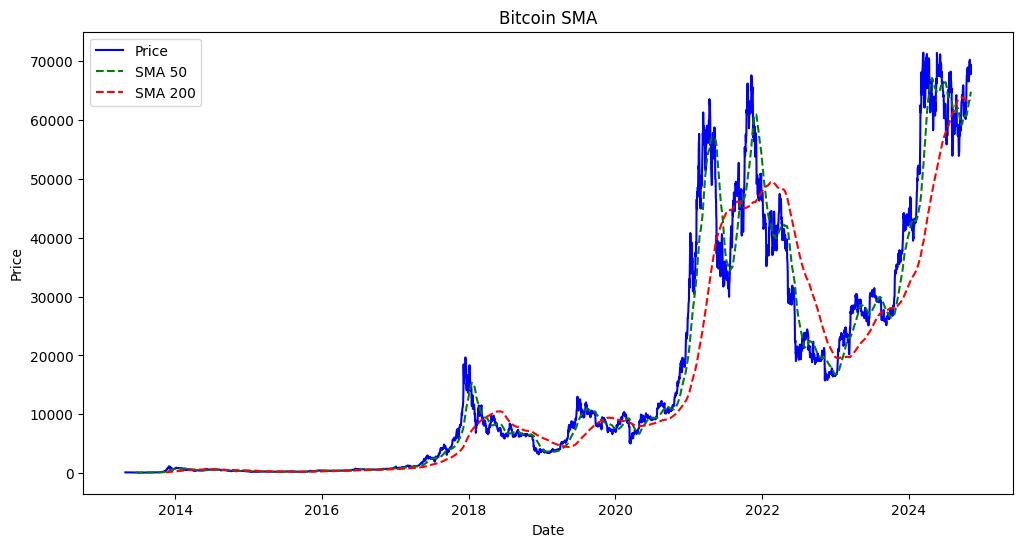

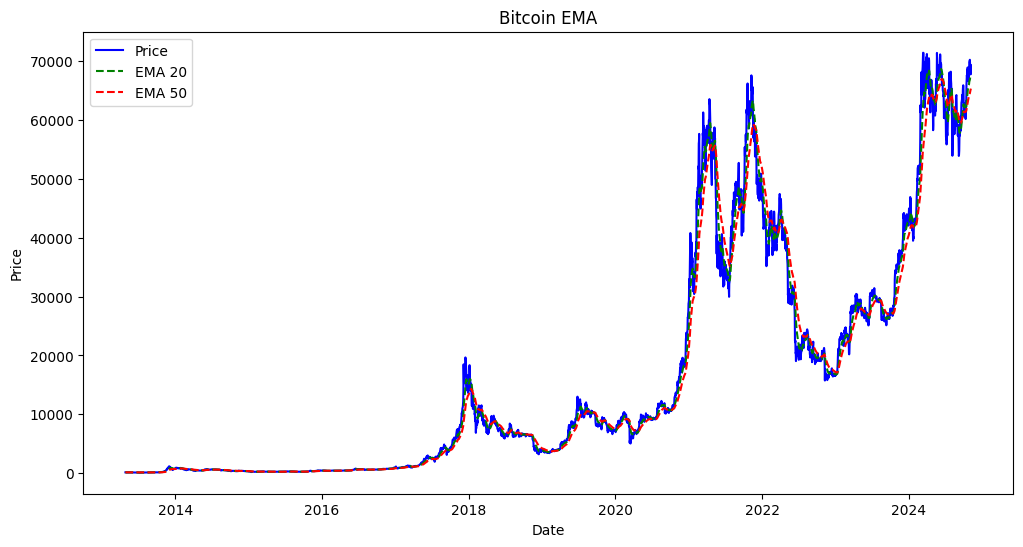

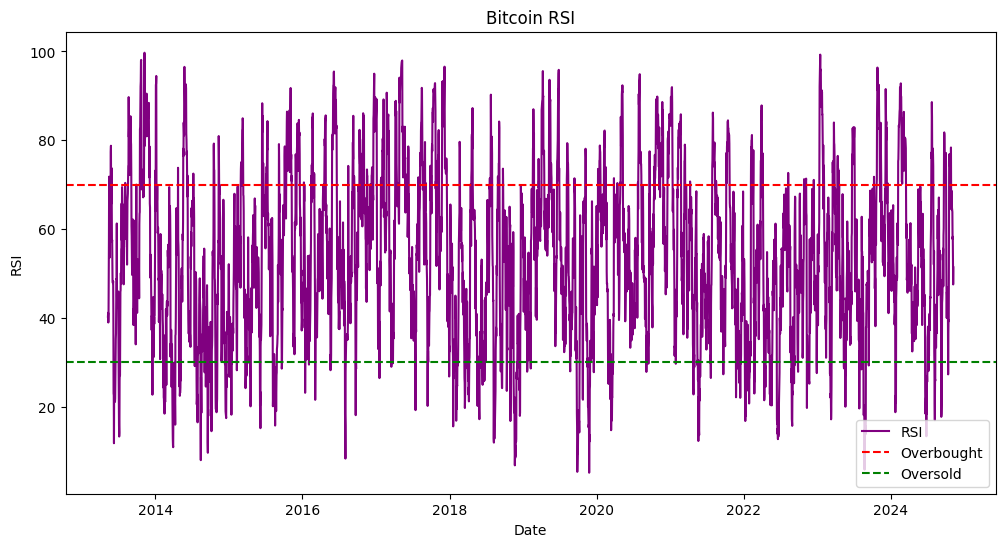

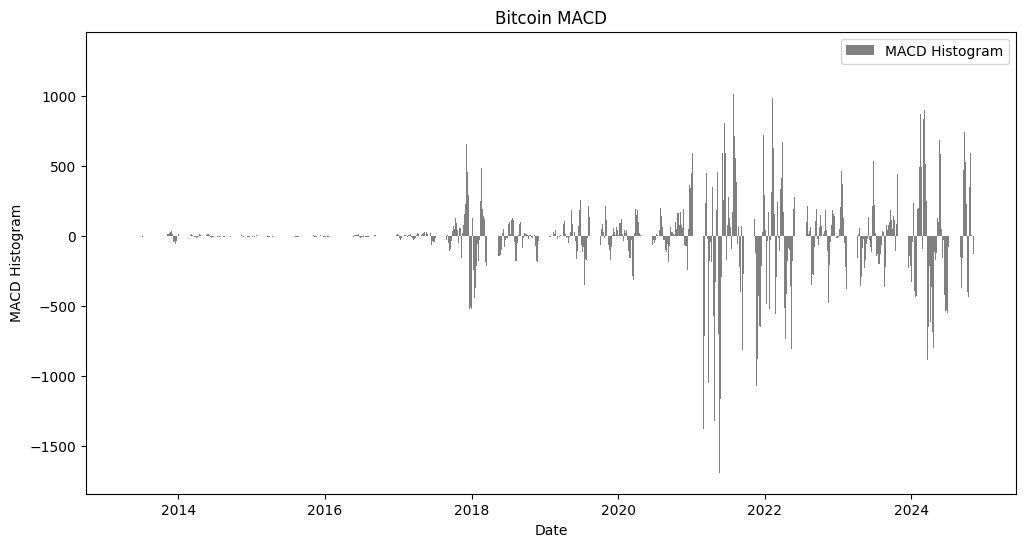

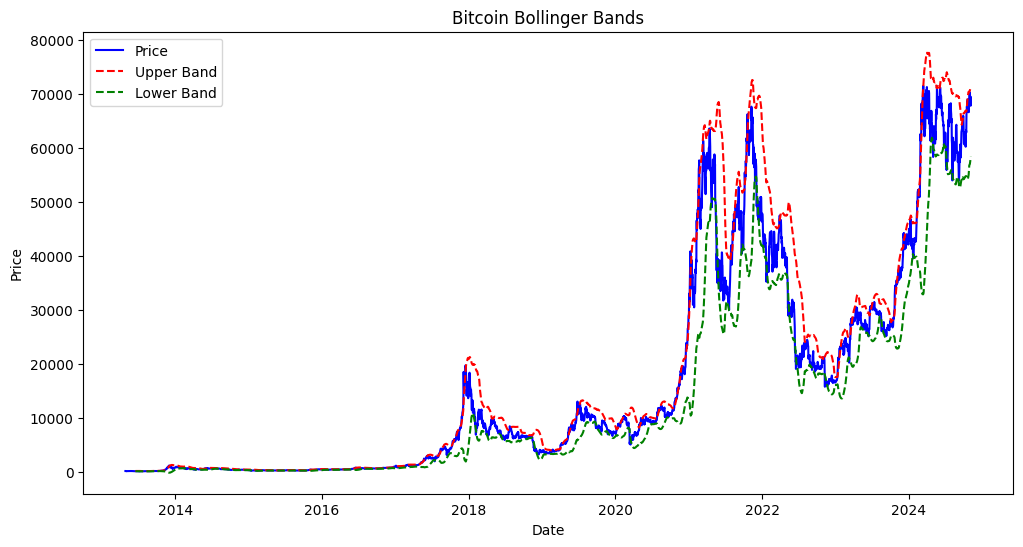

In [98]:
#Plotting the Bitcoin technical indicators

#SMA
plt.figure(figsize=(12, 6))
plt.plot(Bitcoin_TI['snapped_at'], Bitcoin_TI['price'], label="Price", color="blue")
plt.plot(Bitcoin_TI['snapped_at'], Bitcoin_TI['SMA_50'], label="SMA 50", linestyle="--", color="green")
plt.plot(Bitcoin_TI['snapped_at'], Bitcoin_TI['SMA_200'], label="SMA 200", linestyle="--", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bitcoin SMA")
plt.legend()
plt.show()

#SMA
plt.figure(figsize=(12,6))
plt.plot(Bitcoin_TI['snapped_at'], Bitcoin_TI['price'], label="Price", color="blue")
plt.plot(Bitcoin_TI['snapped_at'], Bitcoin_TI['EMA_20'], label="EMA 20", linestyle="--", color="green")
plt.plot(Bitcoin_TI['snapped_at'], Bitcoin_TI['EMA_50'], label="EMA 50", linestyle="--", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bitcoin EMA")
plt.legend()
plt.show()

#RSI
plt.figure(figsize=(12, 6))
plt.plot(Bitcoin_TI['snapped_at'], Bitcoin_TI['RSI'], color='purple', label="RSI")
plt.axhline(y=70, color='red', linestyle='--', label="Overbought")
plt.axhline(y=30, color='green', linestyle='--', label="Oversold")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.title("Bitcoin RSI")
plt.legend()
plt.show()

#MACD
plt.figure(figsize=(12,6))
plt.bar(Bitcoin_TI['snapped_at'], Bitcoin_TI['MACD_Histogram'], color='gray', label="MACD Histogram")
plt.xlabel("Date")
plt.ylabel("MACD Histogram")
plt.title("Bitcoin MACD")
plt.legend()
plt.show()

#Bollinger bands
plt.figure(figsize=(12,6))
plt.plot(Bitcoin_TI["snapped_at"], Bitcoin_TI["price"], label="Price", color='blue')
plt.plot(Bitcoin_TI["snapped_at"], Bitcoin_TI["BB_Upper"], label="Upper Band", linestyle="--", color="red")
plt.plot(Bitcoin_TI["snapped_at"], Bitcoin_TI["BB_Lower"], label="Lower Band", linestyle="--", color="green")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Bitcoin Bollinger Bands")
plt.legend()
plt.show()

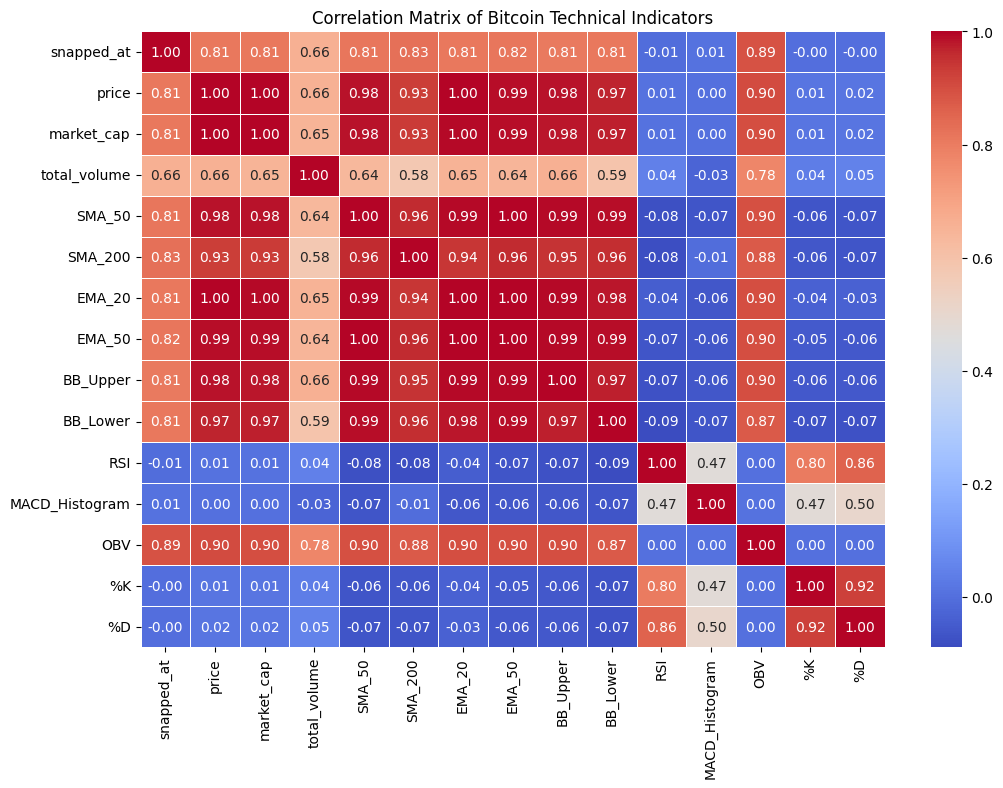

In [99]:
#Plotting Bitcoin correlation matrix to see the realatinship between the features

corr_matrix = Bitcoin_TI.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Bitcoin Technical Indicators")

plt.show()

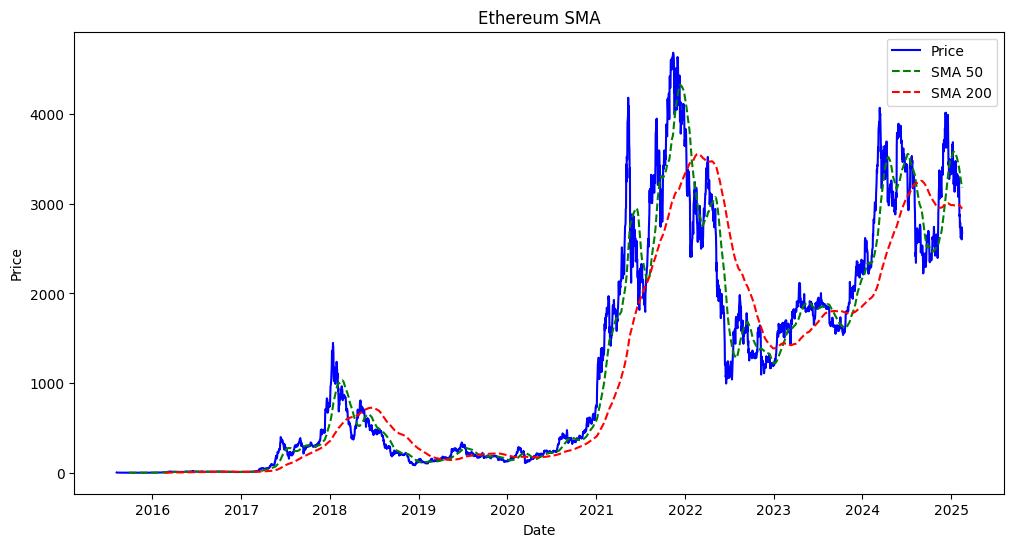

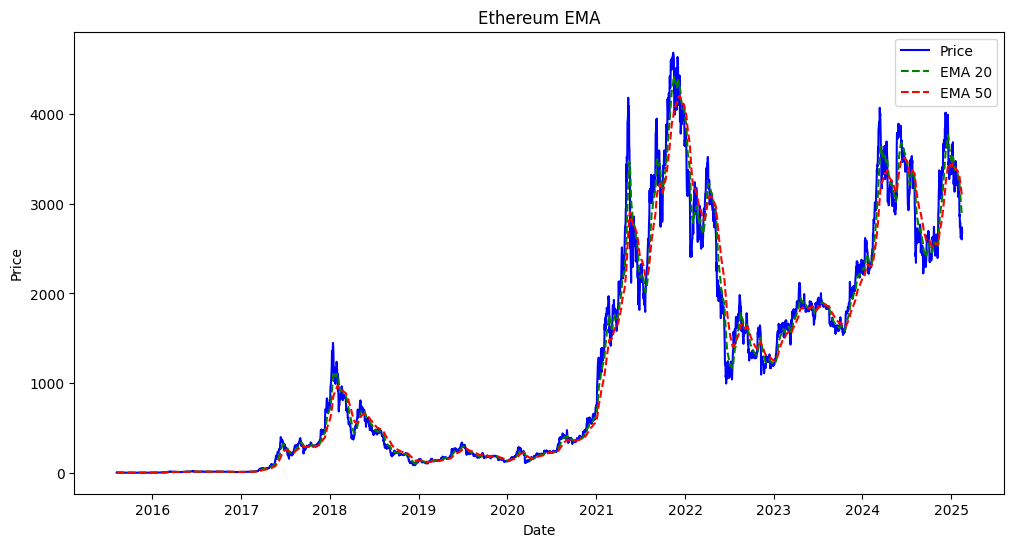

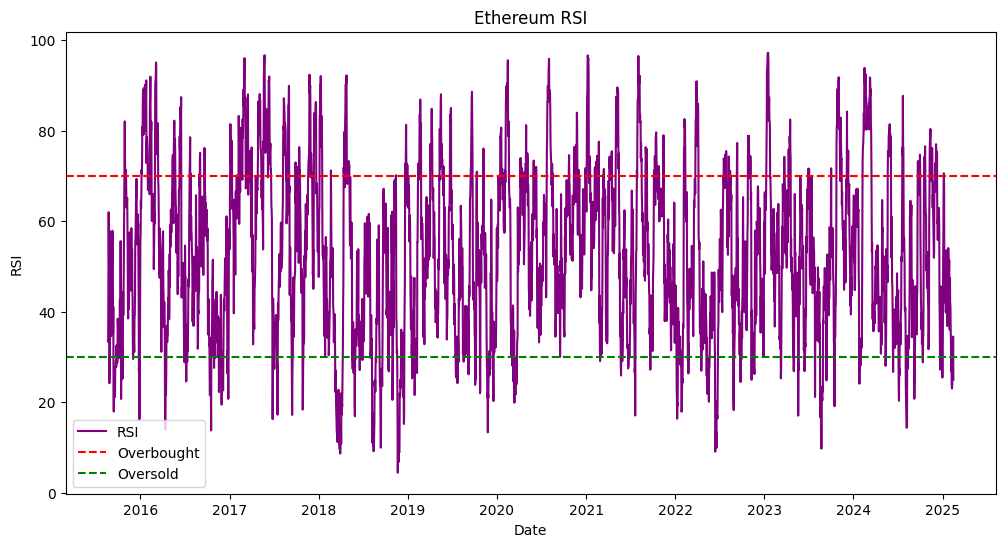

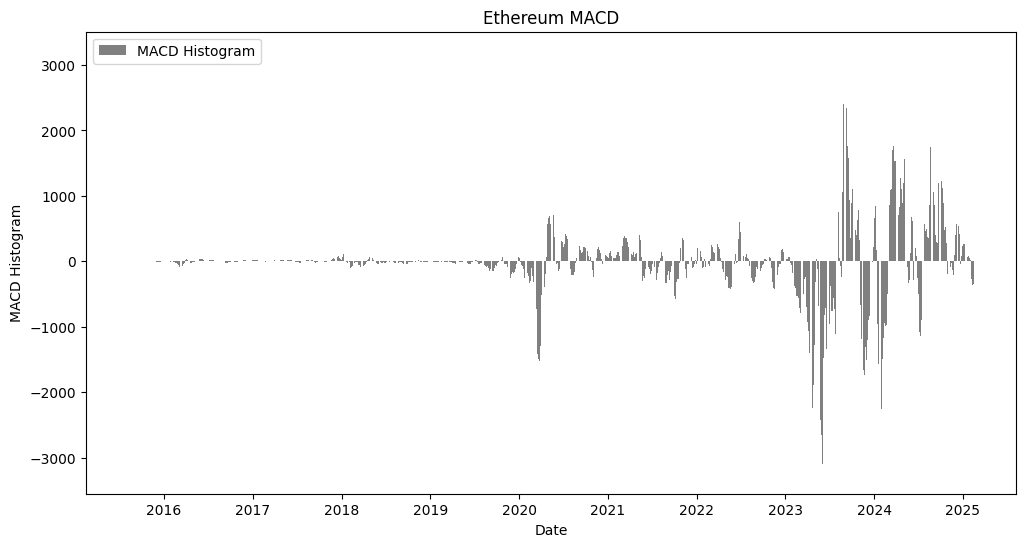

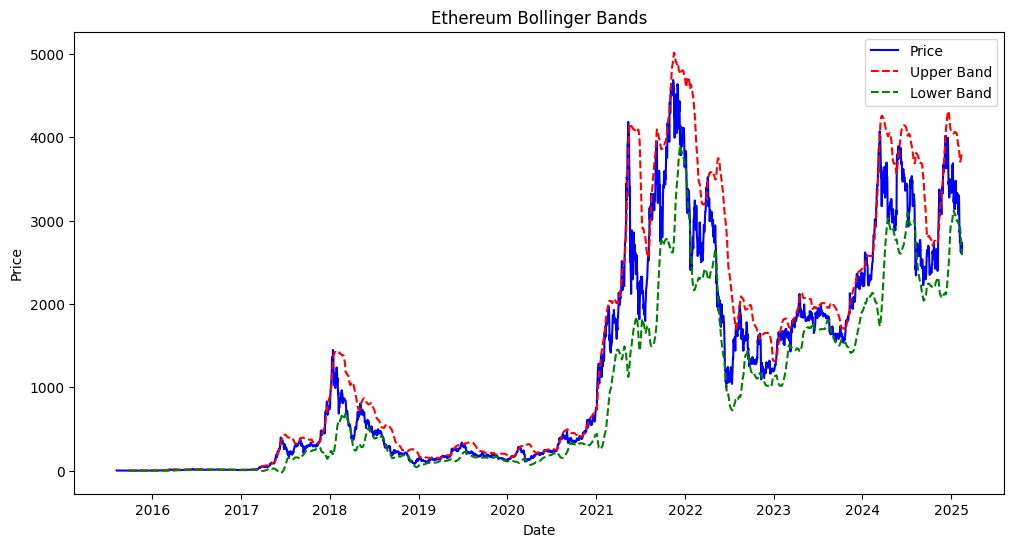

In [100]:
#Plotting the Ethereum technical indicators

#SMA
plt.figure(figsize=(12, 6))
plt.plot(Ethereum_TI['snapped_at'], Ethereum_TI['price'], label="Price", color="blue")
plt.plot(Ethereum_TI['snapped_at'], Ethereum_TI['SMA_50'], label="SMA 50", linestyle="--", color="green")
plt.plot(Ethereum_TI['snapped_at'], Ethereum_TI['SMA_200'], label="SMA 200", linestyle="--", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Ethereum SMA")
plt.legend()
plt.show()

#EMA
plt.figure(figsize=(12,6))
plt.plot(Ethereum_TI['snapped_at'], Ethereum_TI['price'], label="Price", color="blue")
plt.plot(Ethereum_TI['snapped_at'], Ethereum_TI['EMA_20'], label="EMA 20", linestyle="--", color="green")
plt.plot(Ethereum_TI['snapped_at'], Ethereum_TI['EMA_50'], label="EMA 50", linestyle="--", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Ethereum EMA")
plt.legend()
plt.show()

#RSI
plt.figure(figsize=(12, 6))
plt.plot(Ethereum_TI['snapped_at'], Ethereum_TI['RSI'], color='purple', label="RSI")
plt.axhline(y=70, color='red', linestyle='--', label="Overbought")
plt.axhline(y=30, color='green', linestyle='--', label="Oversold")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.title("Ethereum RSI")
plt.legend()
plt.show()

#MACD
plt.figure(figsize=(12, 6))
plt.bar(Ethereum_TI['snapped_at'], Ethereum_TI['MACD_Histogram'], color='gray', label="MACD Histogram")
plt.xlabel("Date")
plt.ylabel("MACD Histogram")
plt.title("Ethereum MACD")
plt.legend()
plt.show()

#Bollinger bands
plt.figure(figsize=(12,6))
plt.plot(Ethereum_TI["snapped_at"], Ethereum_TI["price"], label="Price", color='blue')
plt.plot(Ethereum_TI["snapped_at"], Ethereum_TI["BB_Upper"], label="Upper Band", linestyle="--", color="red")
plt.plot(Ethereum_TI["snapped_at"], Ethereum_TI["BB_Lower"], label="Lower Band", linestyle="--", color="green")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Ethereum Bollinger Bands")
plt.legend()
plt.show()

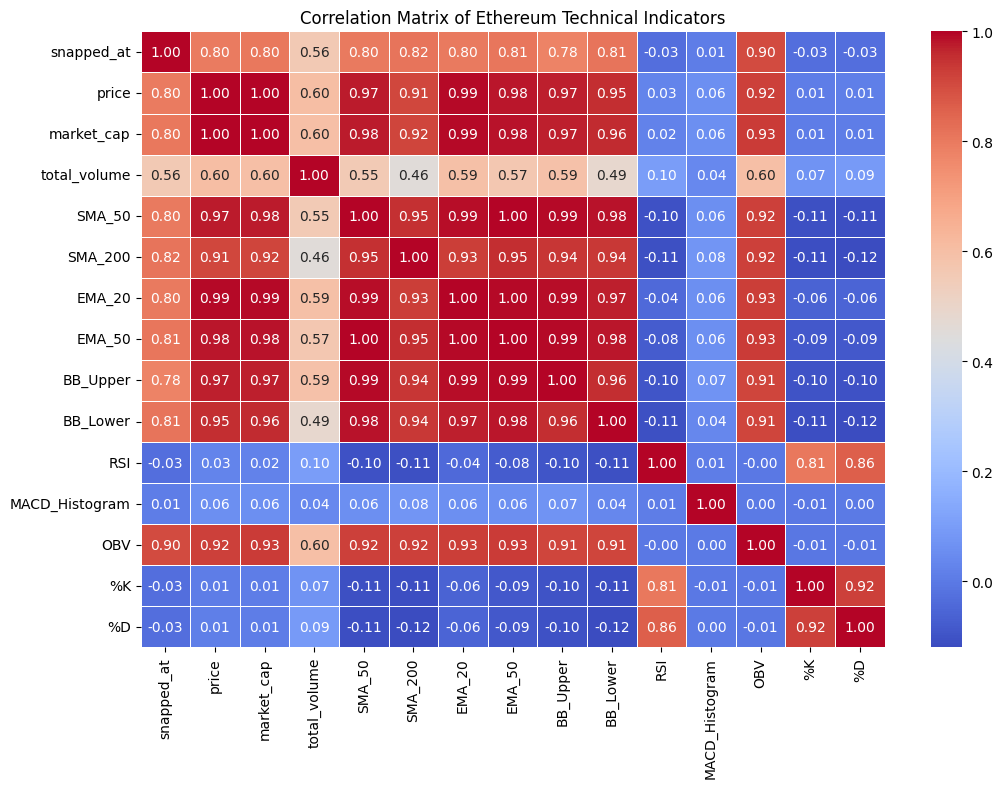

In [101]:
#Plotting Bitcoin correlation matrix to see the realatinship between the features

corr_matrix = Ethereum_TI.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Ethereum Technical Indicators")

plt.show()

##**Models Implementation**

In [102]:
#Setting dates as index for predictions and plots
#Defining traget varaiable and features

Bitcoin_TI.set_index('snapped_at', inplace=True)
target = 'price'
features = ['SMA_50', 'SMA_200', 'EMA_20', 'EMA_50', 'BB_Upper', 'BB_Lower', 'RSI', 'MACD_Histogram', '%K', '%D']

#Defining standard scalar to scale the data
scaler = StandardScaler()
#Defining imputer to fill any missing values
imputer = SimpleImputer(strategy='mean')

In [103]:
#SVM Preprocessing

data = Bitcoin_TI[[target] + features]

#Using mean imputer to fill the misssing values
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns, index=data.index)

#Features X and y
X_imputed= data_imputed[features]
y_imputed= data_imputed[target]

#Training and testing split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, shuffle=False)

#Standard scalar to scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
#Basic SVM(Regression) implementation

#Defining the model with basic parameters
svm_model = SVR(kernel='rbf', C=100, gamma=0.01, epsilon=0.2)

#Fitting the model on train set
svm_model.fit(X_train_scaled, y_train)

#Prediting the target variable
y_pred = svm_model.predict(X_test_scaled)

#Calculating the Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#Saving into a dictionary to use them later for model comparision
metrics_svm={
    'mse': mse,
    'r2': r2,
    'rmse': rmse,
    'mape': mape
}

#Printing the metrics
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

RMSE: 12820.3910
MSE: 164362426.4405
MAPE: 18.6132%
R2 value: 0.5042


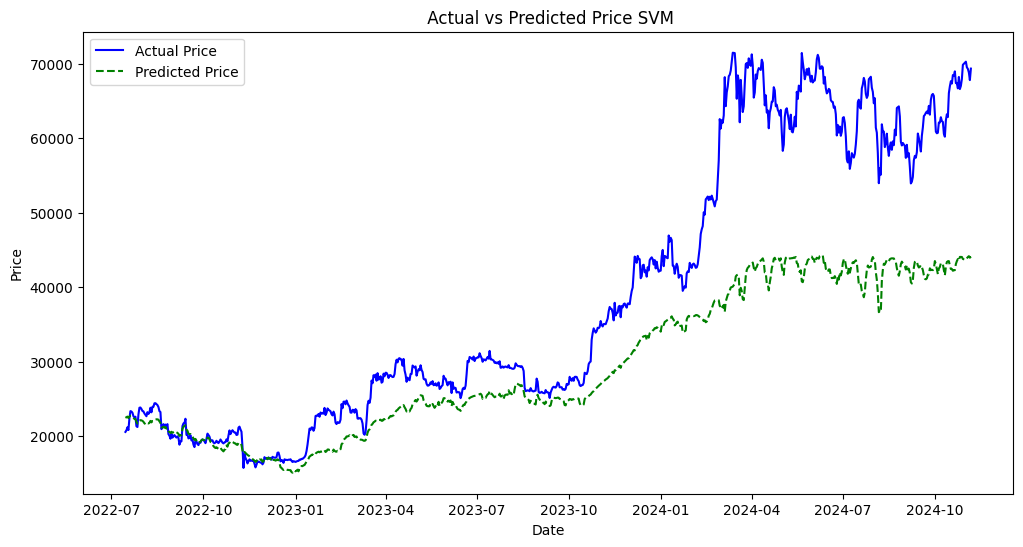

In [105]:
#Plotting the actual prices and predicted prices

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Price", linestyle='--', color='green')
plt.title(' Actual vs Predicted Price SVM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Best Parameters: {'gamma': 0.001, 'epsilon': 0.01, 'C': 1000}
RMSE: 7504.2152
MSE: 56313246.3336
MAPE: 13.2558%
R2 value: 0.8301


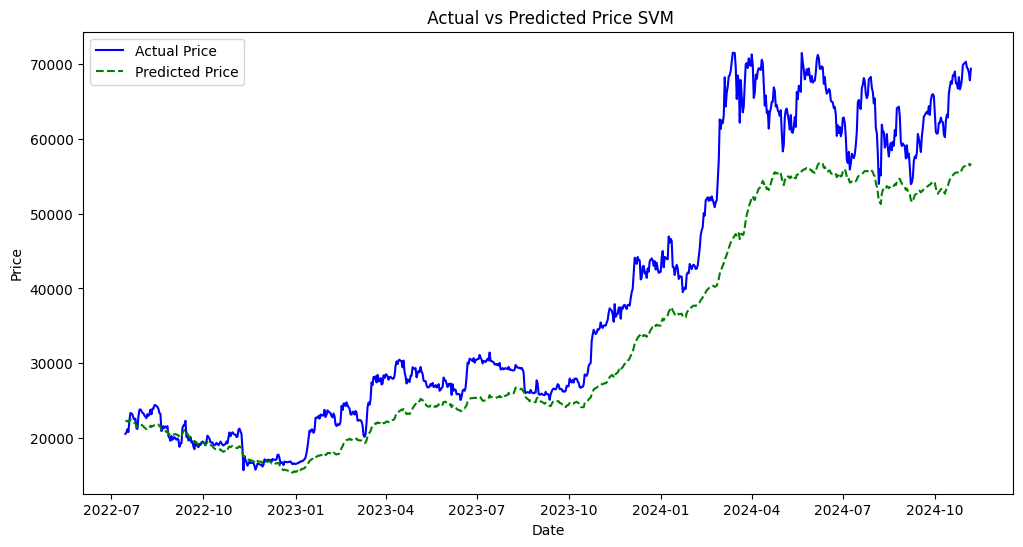

In [106]:
#Parameter tuning for svm as the performance was low

#Defining the parameters
param_dist = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
    'epsilon': [0.01, 0.05, 0.1, 0.2, 0.5]
}

#Defining the model to perform parameter tuning
svr = SVR(kernel='rbf')

#Using randomizedsearchCV to find the best parameters
random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

#Printing the best parameters
print("Best Parameters:", random_search.best_params_)

#Making the predictions on the model using best parameters found by randomizedsearchCV
best_svr = random_search.best_estimator_
y_pred = best_svr.predict(X_test_scaled)

#Calculating the metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

#Saving into a dictionary to use them later for model comparision
metrics_svm_tuned=   {
    'mse': mse,
    'r2': r2,
    'rmse': rmse,
    'mape': mape}

#Printing the metrics
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

#Plotting the actual prices and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Price", linestyle='--', color='green')
plt.title(' Actual vs Predicted Price SVM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

RMSE: 1686.0322
MSE: 2842704.5273
MAPE: 2.7133%
R2 value: 0.9914


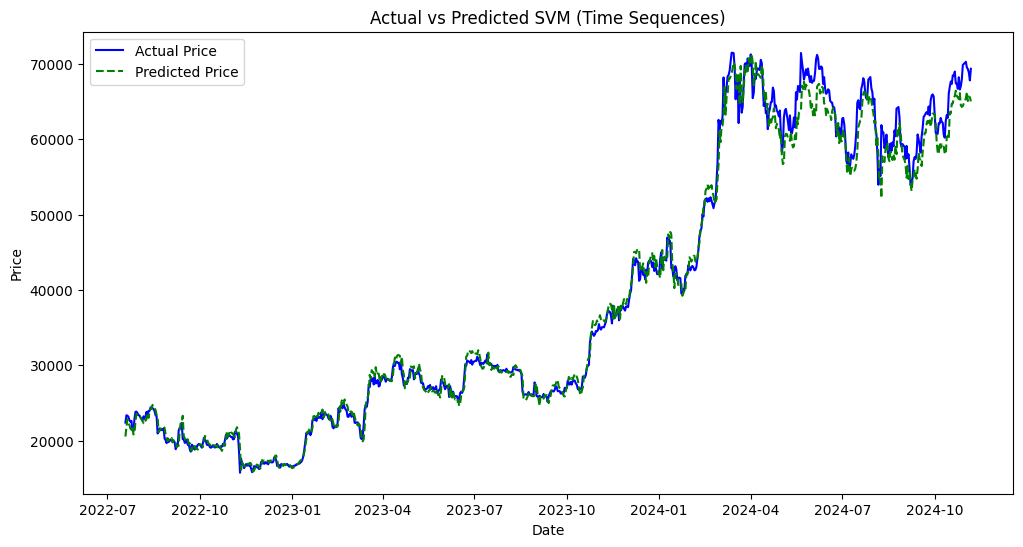

In [107]:
#Now to leverage time series features from the dataset im creating time sequences with lag feature of 4 days which means previous 4 days price shall be used to preict next day value

#Defining targets and features
X = Bitcoin_TI[features]
y = Bitcoin_TI[target]

#Splitting the train test split before lag feature
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, shuffle=False)

#Imputing the missing values using the mean imputer defined earlier
X_train_raw = imputer.fit_transform(X_train_raw)
X_test_raw = imputer.transform(X_test_raw)

#Scaling the data using the standard scalar defined earlier
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

y_train_scaled = scaler.fit_transform(y_train_raw.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test_raw.values.reshape(-1, 1)).flatten()

#Creating the time sequences with 4 days lag feature to predict future value
def time_sequences(X, y, seq_length=4):
    return (
        np.array([X[i:i + seq_length] for i in range(len(X) - seq_length)]),
        np.array([y[i + seq_length] for i in range(len(y) - seq_length)]),
    )

#Assigning the sequences created to train and test splits
X_train_seq, y_train_seq = time_sequences(X_train_scaled, y_train_scaled, seq_length=4)
X_test_seq, y_test_seq = time_sequences(X_test_scaled, y_test_scaled, seq_length=4)

#Reshaping the input splits into 2D as SVM expects 2D input
X_train_seq = X_train_seq.reshape(X_train_seq.shape[0], -1)
X_test_seq = X_test_seq.reshape(X_test_seq.shape[0], -1)

#Defining the model using the best paramters obtainted using randomsearchsv in above cell
svm_model = SVR(kernel='rbf', C=1000, gamma=0.001, epsilon=0.01)

#Training the model on input sequences
svmodel = svm_model.fit(X_train_seq, y_train_seq)

#Predicting the target variable
y_pred_scaled = svm_model.predict(X_test_seq)

#Inverse transforming and flattening the outputs for plots and metrics calculations
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler.inverse_transform(y_test_seq.reshape(-1, 1)).flatten()

#Metrics calculation
mse = mean_squared_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100

#Saving into a dictionary to use them later for model comparision
metrics_svm_timesequences={
    'mse': mse,
    'r2': r2,
    'rmse': rmse,
    'mape': mape}

#Printing the metrics
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

#Plotting the actual prices and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_raw.index[-len(y_test_actual):], y_test_actual, label="Actual Price", color='blue')
plt.plot(y_test_raw.index[-len(y_test_actual):], y_pred, label="Predicted Price", linestyle='--', color='green')
plt.title('Actual vs Predicted SVM (Time Sequences)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

RMSE: 3335.0396
MSE: 11122489.2244
MAPE: 6.2382%
R2 value: 0.9664


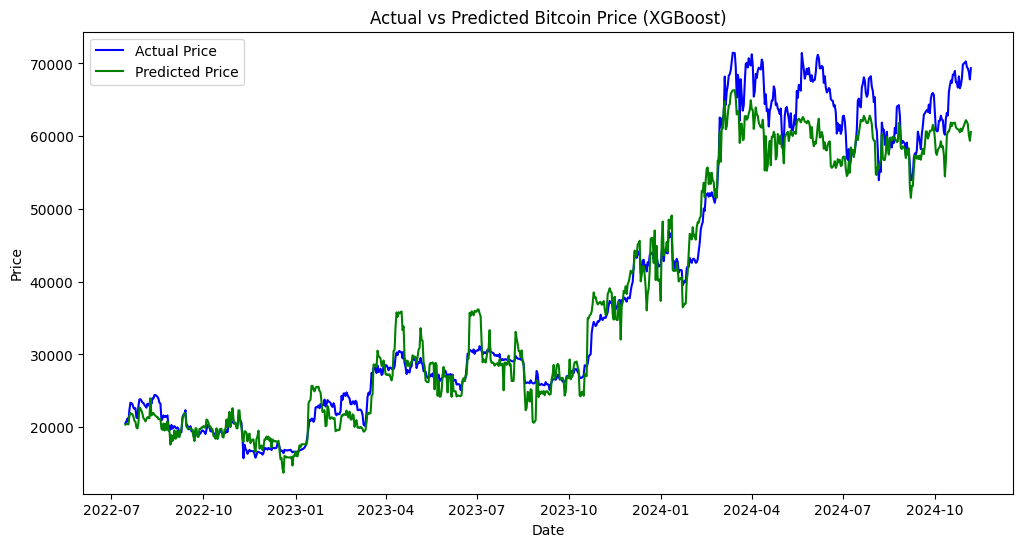

In [108]:
#XGboost model implementation

#Feature variables and target variable
X = Bitcoin_TI[features]
y = Bitcoin_TI[target]

#Training and testing split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#Scaling the festures
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Defining and training the Xgboost model with default parameters
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.3, max_depth=6)
model.fit(X_train_scaled, y_train)

#Predicting the target variable
y_pred = model.predict(X_test_scaled)

#Calculating the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#Saving into a dictionary to use them later for model comparision
metrics_xgboost={
    'mse': mse,
    'r2': r2,
    'rmse': rmse,
    'mape': mape}

#Printing the metrics
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

#Plotting the actual prices and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Price", color='green')
plt.title('Actual vs Predicted Bitcoin Price (XGBoost)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters: {'subsample': 0.6, 'n_estimators': 700, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.7}
RMSE: 3714.8065
MSE: 13799787.1561
MAPE: 6.8996%
R2 value: 0.9584


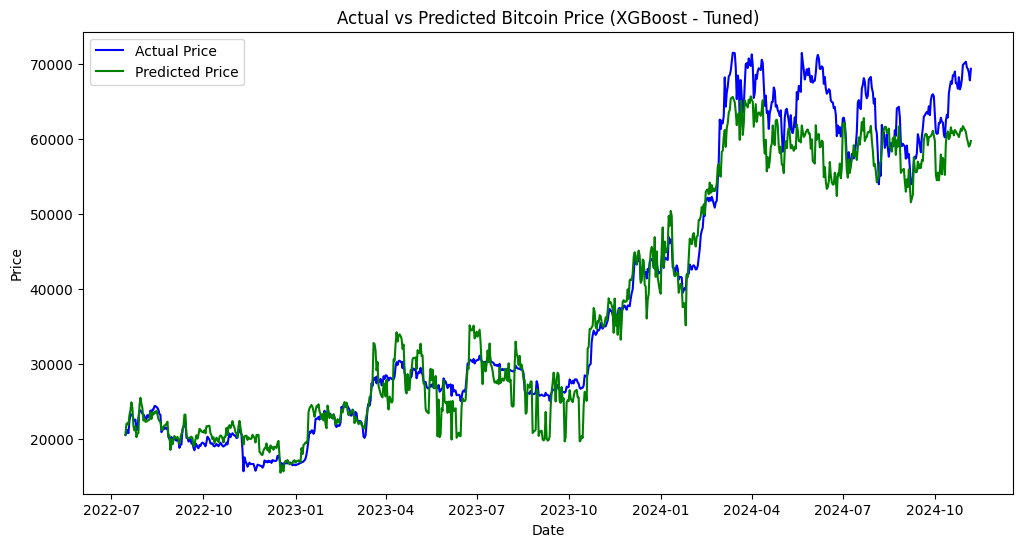

In [109]:
#XGboost paramter tuninh using randomsearchCV

#Using the same preprocessing and scaling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Running a paramter search
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
param_dist = {
    'n_estimators': [100, 200, 300, 500, 700, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 6, 7, 9, 12],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5]
}

#Finding the best parameters using mse as a measure
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist,
                                   n_iter=20, cv=3, n_jobs=-1, scoring='neg_mean_squared_error',
                                  verbose=2)

random_search.fit(X_train_scaled, y_train)

#Printing the parametrs found
best_params = random_search.best_params_
print("Best parameters:", best_params)

#model with best parameters
best_model = random_search.best_estimator_

#Training the data on the best model
best_model.fit(X_train_scaled, y_train)

#Predicting the target variable
y_pred = best_model.predict(X_test_scaled)

#Calculating the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#Saving into a dictionary to use them later for model comparision
metrics_xgboost_tuned={
    'mse': mse,
    'r2': r2,
    'rmse': rmse,
    'mape': mape
}

#Printing the metrics
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

#Plotting the actual prices and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Price", color='green')
plt.title('Actual vs Predicted Bitcoin Price (XGBoost - Tuned)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

RMSE: 5252.7775
MSE: 27591671.7175
MAPE: 11.4746%
R2 value: 0.9168


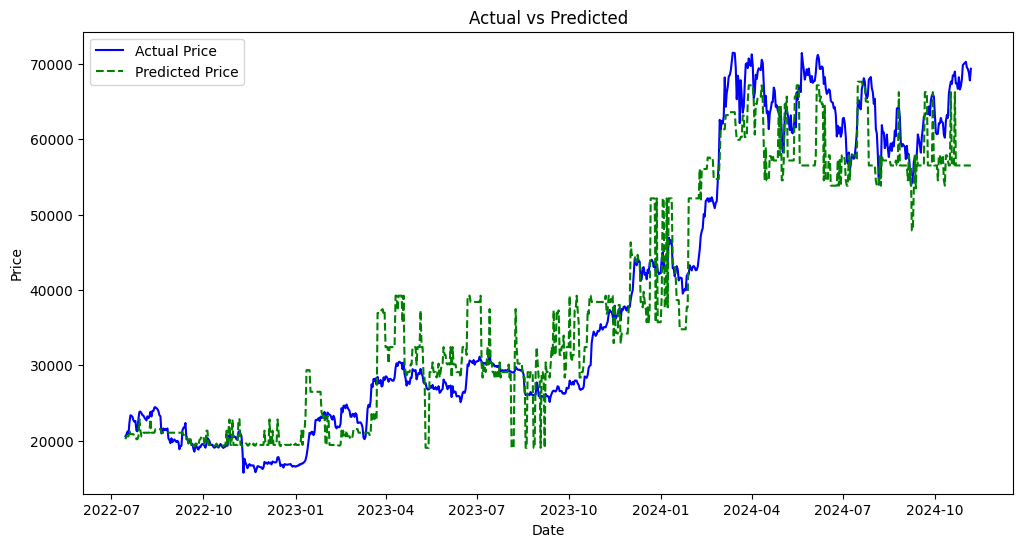

In [110]:
#Implementing Decision tree model

#Feature variables and target variable
X = Bitcoin_TI[features]
y = Bitcoin_TI[target]

#Training and testing split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#Scaling the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Defining and training the decision tree model with all default parameters
model = DecisionTreeRegressor(random_state=10)
model.fit(X_train_scaled, y_train)

#Making the predictions
y_pred = model.predict(X_test_scaled)

#Calculating the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#Saving into a dictionary to use them later for model comparision
metrics_decisiontree={
    'mse': mse,
    'r2': r2,
    'rmse': rmse,
    'mape': mape
}

#Printing the metrics
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

#Plotting the actual prices and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Price",linestyle='--',color='green')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_depth': 20}
RMSE: 4963.8428
MSE: 24639735.7211
MAPE: 11.1480%
R2: 0.9257


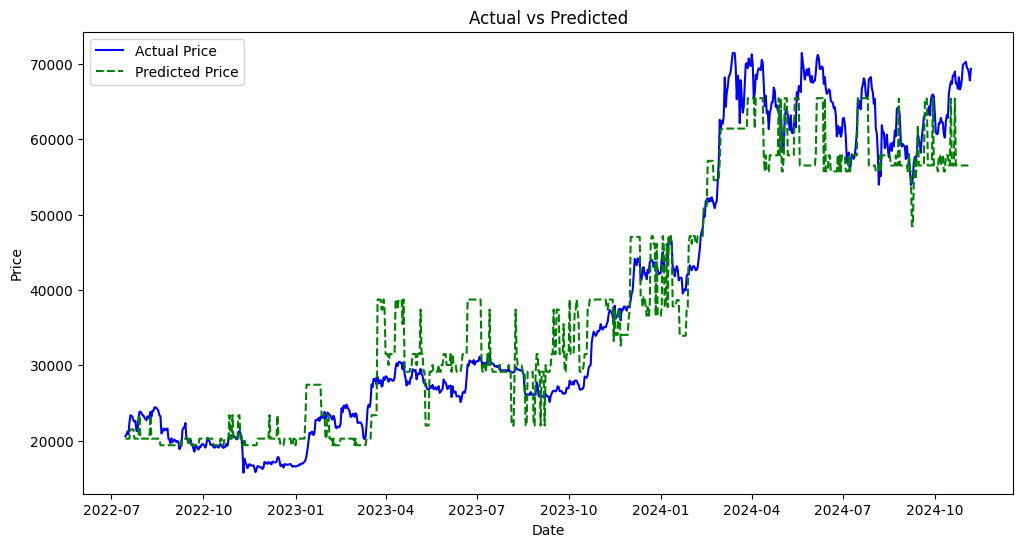

In [111]:
#Decision tree paramter tuning using randomsearchCV

#Using the same preprocessing and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Running a paramter search
model = DecisionTreeRegressor(random_state=10)
param_dist = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20],
}

#Finding the best parameters using default metric (R2 value) as a measure
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=50, cv=5, n_jobs=-1, random_state=10, verbose=2)
random_search.fit(X_train_scaled, y_train)

#Printing the parametrs found
print(f"Best parameters: {random_search.best_params_}")

#model with best parameters
best_model = random_search.best_estimator_

#Training the data on the best model
best_model.fit(X_train_scaled, y_train)

#Predicting the target variable
y_pred = best_model.predict(X_test_scaled)

#Calculating the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#Saving into a dictionary to use them later for model comparision
metrics_decisiontree_tuned={
    'mse': mse,
    'r2': r2,
    'rmse': rmse,
    'mape': mape
}

#Printing the metrics
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2: {r2:.4f}")

#Plotting the actual prices and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label="Actual Price", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Price",linestyle='--',color='green')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - loss: 371733248.0000 - val_loss: 1775856512.0000
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 293490560.0000 - val_loss: 71346008.0000
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34952020.0000 - val_loss: 50573636.0000
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 24781830.0000 - val_loss: 32408714.0000
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19957998.0000 - val_loss: 33467516.0000
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18432928.0000 - val_loss: 23825072.0000
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16224273.0000 - val_loss: 22145706.0000
Epoch 8/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14740399.0000 - val_loss: 22180336.0000
Epoch 9/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11382180.0000 - val_loss: 24772496.0000
Epoch 10/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11644246.0000 - val_loss: 26560854.0000
Epoc

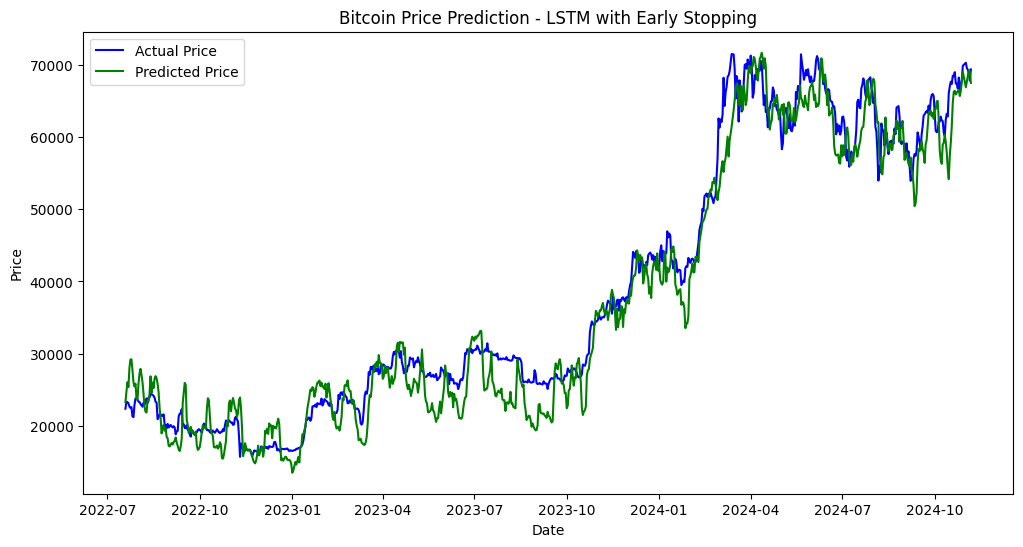

In [112]:
#LSTM Model implementation

#Defining the bitcoin technical indicators df
Bitcoin_TI = Bitcoin_afterclean[["snapped_at", "price","market_cap","total_volume" ,"SMA_50", "SMA_200", "EMA_20", "EMA_50", "BB_Upper", "BB_Lower", "RSI", "MACD_Histogram","OBV","%K","%D"]]

#Feature variables and target variables
features = ['SMA_50', 'SMA_200', 'EMA_20', 'EMA_50', 'BB_Upper', 'BB_Lower', 'RSI', 'MACD_Histogram', 'OBV', '%K', '%D']
target = 'price'

#Assigning X y and dates as numpy values from the dataframes for lstm modelling
X = Bitcoin_TI[features].values
y = Bitcoin_TI[target].values
dates = pd.to_datetime(Bitcoin_TI['snapped_at']).values

#Training and testing split (80/20)
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, test_size=0.2, shuffle=False)

#Imputing any misising values using the mean imputer defiend earlier
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

#Scaling the feature variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Creating the time sequences with 4 days lag feature to predict future value, tracking date sequences
def time_sequences(X, y, dates, seq_length=4):
    return (
        np.array([X[i:i + seq_length] for i in range(len(X) - seq_length)]),
        np.array([y[i + seq_length] for i in range(len(y) - seq_length)]),
        np.array([dates[i + seq_length] for i in range(len(dates) - seq_length)])
    )
#Assigning the sequences created to train and test splits
X_train_seq, y_train_seq, dates_train_seq = time_sequences(X_train, y_train, dates_train, seq_length=4)
X_test_seq, y_test_seq, dates_test_seq = time_sequences(X_test, y_test, dates_test, seq_length=4)

#Defining seqence length for lstm model input
seq_length = 4

#Defing the LSTM model with 2 lstm layers
model = Sequential([
    Input(shape=(seq_length, len(features))),
    LSTM(50, activation='relu', return_sequences=True),
    LSTM(30, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(10, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

#Early stopping to prevent over fitiing
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=40,
                               restore_best_weights=True,
                               verbose=1)

#Training the defined model on the data
sepecified_model = model.fit(X_train_seq, y_train_seq,
                    epochs=200,
                    batch_size=64,
                    validation_data=(X_test_seq, y_test_seq),
                    callbacks=[early_stopping])

#Making predictions of target value on trained model
y_pred = model.predict(X_test_seq)

#Chcked the shape the shaped before number of predictions and actual values are not matching to calculte the metrics
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

#Slicing the test predictions to match the prediction values length (beacause we used lag feature of 4 so we need previous 4 values to predict next and first 4 values doesnt have previous 4 values)
y_test = y_test[seq_length:]

#flatenning the outputs to 1D for metrics calculation
y_pred = y_pred.flatten()

#Calculating the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#Saving into a dictionary to use them later for model comparision
metrics_lstm={
    'mse': mse,
    'r2': r2,
    'rmse': rmse,
    'mape': mape
}

#Printing the metrics
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

#Plotting the actual prices and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(dates_test_seq, y_test_seq, label="Actual Price", color='blue')
plt.plot(dates_test_seq, y_pred, label="Predicted Price", color='green')
plt.title('Bitcoin Price Prediction - LSTM with Early Stopping')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - loss: 373459168.0000 - val_loss: 1538035072.0000
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 162788048.0000 - val_loss: 89543848.0000
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39431204.0000 - val_loss: 59987780.0000
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28411864.0000 - val_loss: 47707508.0000
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 26384880.0000 - val_loss: 51526064.0000
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18996102.0000 - val_loss: 110647328.0000
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 20423614.0000 - val_loss: 65833496.0000
Epoch 8/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17701026.0000 - val_loss: 43374676.0000
Epoch 9/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 16098432.0000 - val_loss: 73837424.0000
Epoch 10/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12645409.0000 - val_loss: 88094024.0000
Ep

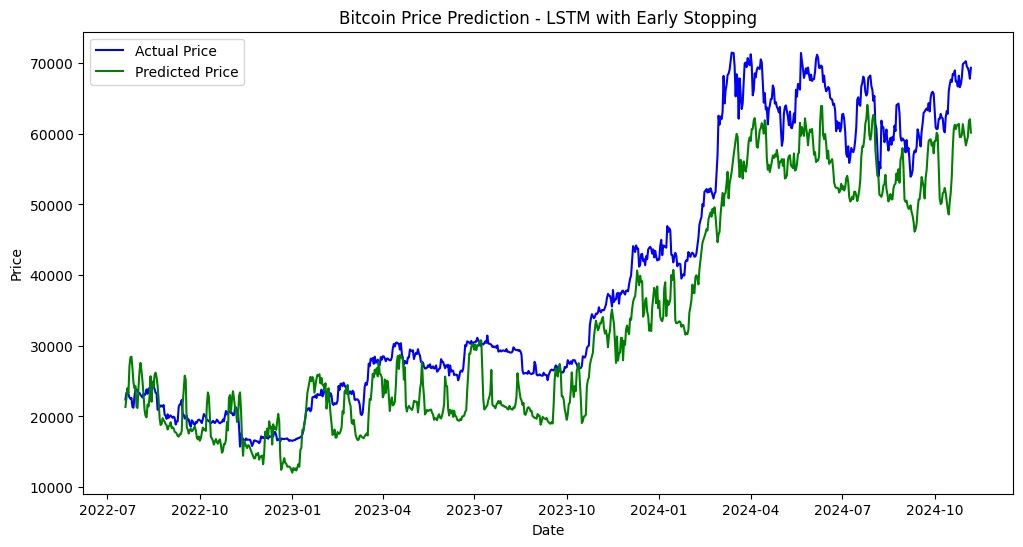

In [113]:
#LSTM Model with 3 layers

#Defining the bitcoin technical indicators df
Bitcoin_TI = Bitcoin_afterclean[["snapped_at", "price","market_cap","total_volume" ,"SMA_50", "SMA_200", "EMA_20", "EMA_50", "BB_Upper", "BB_Lower", "RSI", "MACD_Histogram","OBV","%K","%D"]]

#Feature variables and target variables
features = ['SMA_50', 'SMA_200', 'EMA_20', 'EMA_50', 'BB_Upper', 'BB_Lower', 'RSI', 'MACD_Histogram', 'OBV', '%K', '%D']
target = 'price'

#Assigning X y and dates as numpy values from the dataframes for lstm modelling
X = Bitcoin_TI[features].values
y = Bitcoin_TI[target].values
dates = pd.to_datetime(Bitcoin_TI['snapped_at']).values

#Training and testing split (80/20)
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates, test_size=0.2, shuffle=False)

#Imputing any misising values using the mean imputer defiend earlier
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

#Scaling the feature variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Creating the time sequences with 4 days lag feature to predict future value, tracking date sequences
def time_sequences(X, y, dates, seq_length=4):
    return (
        np.array([X[i:i + seq_length] for i in range(len(X) - seq_length)]),
        np.array([y[i + seq_length] for i in range(len(y) - seq_length)]),
        np.array([dates[i + seq_length] for i in range(len(dates) - seq_length)])
    )
#Assigning the sequences created to train and test splits
X_train_seq, y_train_seq, dates_train_seq = time_sequences(X_train, y_train, dates_train, seq_length=4)
X_test_seq, y_test_seq, dates_test_seq = time_sequences(X_test, y_test, dates_test, seq_length=4)

#Defining seqence length for lstm model input
seq_length = 4

#Defing the LSTM model with 3 lstm layers and 30% dropout
model = Sequential([
    Input(shape=(seq_length, len(features))),
    LSTM(100, activation='relu', return_sequences=True),
    LSTM(50, activation='relu', return_sequences=True),
    LSTM(30, activation='relu', return_sequences=False),
    Dropout(0.3),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

#Early stopping to prevent over fitiing
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=40,
                               restore_best_weights=True,
                               verbose=1)

#Training the defined model on the data
sepecified_model = model.fit(X_train_seq, y_train_seq,
                    epochs=200,
                    batch_size=64,
                    validation_data=(X_test_seq, y_test_seq),
                    callbacks=[early_stopping])

#Making predictions of target value on trained model
y_pred = model.predict(X_test_seq)

#Chcked the shape the shaped before number of predictions and actual values are not matching to calculte the metrics
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")

#Slicing the test predictions to match the prediction values length (beacause we used lag feature of 4 so we need previous 4 values to predict next and first 4 values doesnt have previous 4 values)
y_test = y_test[seq_length:]

#flatenning the outputs to 1D for metrics calculation
y_pred = y_pred.flatten()

#Calculating the metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#Saving into a dictionary to use them later for model comparision
metrics_lstm_morelayers={
    'mse': mse,
    'r2': r2,
    'rmse': rmse,
    'mape': mape
}

#Printing the metrics
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R2 value: {r2:.4f}")

#Plotting the actual prices and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(dates_test_seq, y_test_seq, label="Actual Price", color='blue')
plt.plot(dates_test_seq, y_pred, label="Predicted Price", color='green')
plt.title('Bitcoin Price Prediction - LSTM with Early Stopping')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [114]:
models_metrics = pd.DataFrame([
    {'Model': 'SVM', **metrics_svm},
    {'Model': 'SVM Tuned', **metrics_svm_tuned},
    {'Model': 'SVM Timesequences', **metrics_svm_timesequences},
    {'Model': 'XGBoost', **metrics_xgboost},
    {'Model': 'XGBoost Tuned', **metrics_xgboost_tuned},
    {'Model': 'Decision Tree', **metrics_decisiontree},
    {'Model': 'Decision Tree Tuned', **metrics_decisiontree_tuned},
    {'Model': 'LSTM', **metrics_lstm},
    {'Model': 'LSTM 3 layers', **metrics_lstm_morelayers}
])

models_metrics.set_index('Model', inplace=True)
models_metrics

,mse,r2,rmse,mape
Model,,,,
SVM,1.643624e+08,0.504205,12820.391041,18.613202
SVM Tuned,5.631325e+07,0.830133,7504.215238,13.255771
SVM Timesequences,2.842705e+06,0.991427,1686.032185,2.713349
XGBoost,1.112249e+07,0.966449,3335.039614,6.238208
XGBoost Tuned,1.379979e+07,0.958373,3714.806476,6.899586
Decision Tree,2.759167e+07,0.916770,5252.777524,11.474557
Decision Tree Tuned,2.463974e+07,0.925675,4963.842838,11.148049
LSTM,1.162742e+07,0.964936,3409.899585,8.196807
LSTM 3 layers,4.337468e+07,0.869196,6585.945366,14.737608


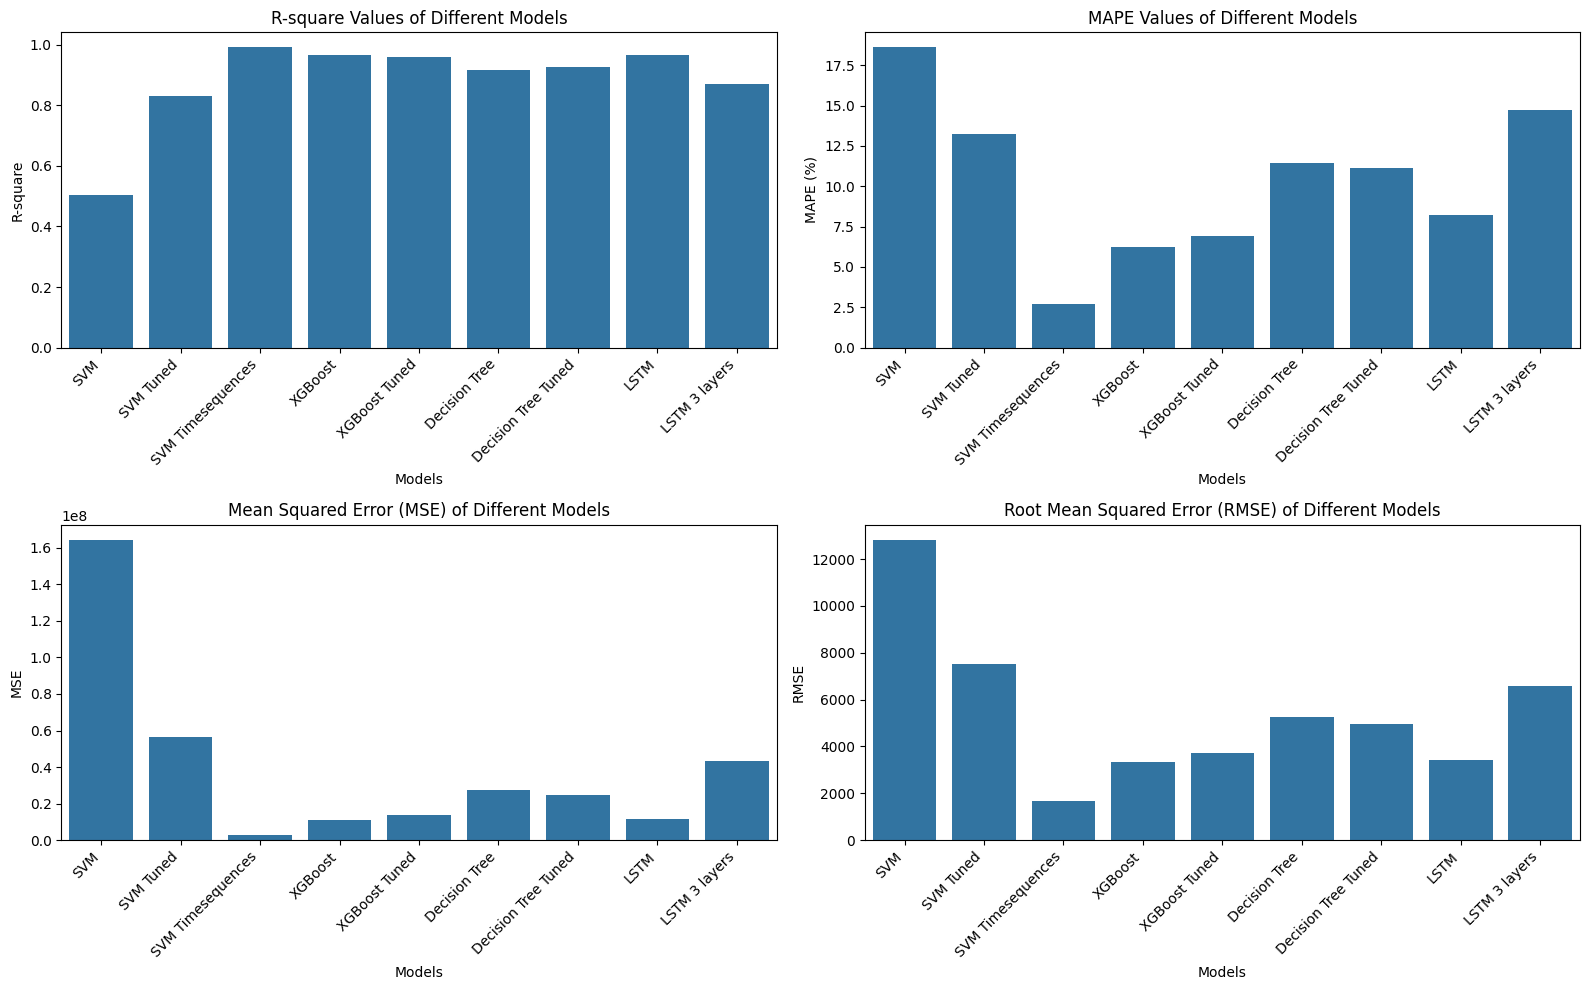

In [115]:
plt.figure(figsize=(16, 10))

models = models_metrics.index

plt.subplot(2, 2, 1)
sns.barplot(x=models, y=models_metrics['r2'])
plt.title('R-square Values of Different Models')
plt.xlabel('Models')
plt.ylabel('R-square')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
sns.barplot(x=models, y=models_metrics['mape'])
plt.title('MAPE Values of Different Models')
plt.xlabel('Models')
plt.ylabel('MAPE (%)')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
sns.barplot(x=models, y=models_metrics['mse'])
plt.title('Mean Squared Error (MSE) of Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
sns.barplot(x=models, y=models_metrics['rmse'])
plt.title('Root Mean Squared Error (RMSE) of Different Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()